## Practice 2

### Víctor Galván Fraile

<img src="./enunciados 1.png" style="height: 500px;"/>

In [1]:
#Primero, importamos todos los paquetes necesarios.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xarray as xr
import netCDF4 as nc
from scipy import stats as sts
from cartopy import crs as ccrs # Cartography library
import cartopy as car
import cmocean as cmo #Oceanographic library for colormaps
import plotly as plty
import matplotlib.patches as mpatches
import cartopy.io.img_tiles as cimgt

Una vez hecho esto, se procede a obtener los datos. Además, la región de estudio de este trabajo radica en el sur de la Península Ibérica, concretamente:

**Sur=region2(-8, 0, 36, 38)**

In [2]:
path= r'C:/Users/ideapad 5 15ITL05/Desktop/Meteo UCM/1 cuatrimestre/Analisis de datos en meteorologia/Practica 2/'
data_max= r'Datos/tmax_pen.nc'
data_min= r'Datos/tmin_pen.nc'


In [3]:
max_data= xr.open_dataset(path+data_max)
min_data= xr.open_dataset(path+data_min)
max_data

<xarray.Dataset>
Dimensions:  (lon: 230, lat: 190, Time: 41638)
Coordinates:
  * lon      (lon) float64 -9.673 -9.614 -9.556 -9.497 ... 3.607 3.665 3.724
  * lat      (lat) float64 44.17 44.12 44.08 44.03 ... 35.8 35.75 35.71 35.66
  * Time     (Time) datetime64[ns] 1901-01-02 1901-01-03 ... 2015-01-01
Data variables:
    tx       (Time, lat, lon) float32 ...
Attributes: (12/13)
    title:             Daily maximum temperature of peninsular Spain
    history:           version 1.0
    keywords:          daily, maximum temperature, peninsular Spain, Spain
    creator_name:      Roberto Serrano-Notivoli; Martin de Luis; Santiago Beg...
    maintainer_name:   Roberto Serrano-Notivoli
    maintainer_email:  rs@unizar.es
    ...                ...
    processing_level:  Quality-controlled. Final values.
    acknowledgment:    This study was supported by research projects financed...
    units:             Celsius degrees
    id:                STEAD
    sources:           AEMET and MAGRAMA
    naming_authority:  Spanish TEmperature At Daily scale

Lo siguiente que hacemos, con objeto de ahorrar mucha memoria, es reducir los datasets a la región que nos interesa

In [4]:
lat_lims= [38,36]
lon_lims= [-8,0]

max_data_red= max_data.sel(lon=slice(lon_lims[0],lon_lims[1]),lat=slice(lat_lims[0],lat_lims[1]),Time=slice('1975','2015'))
min_data_red= min_data.sel(lon=slice(lon_lims[0],lon_lims[1]),lat=slice(lat_lims[0],lat_lims[1]),Time=slice('1975','2015'))
lat_red= max_data_red.lat
lon_red= max_data_red.lon
min_data_red

<xarray.Dataset>
Dimensions:  (lon: 137, lat: 44, Time: 14611)
Coordinates:
  * lon      (lon) float64 -7.976 -7.918 -7.859 ... -0.1371 -0.07858 -0.02008
  * lat      (lat) float64 37.96 37.91 37.87 37.82 ... 36.16 36.11 36.07 36.02
  * Time     (Time) datetime64[ns] 1975-01-01 1975-01-02 ... 2015-01-01
Data variables:
    tn       (Time, lat, lon) float32 ...
Attributes: (12/13)
    title:             Daily minimum temperature of peninsular Spain
    history:           version 1.0
    keywords:          daily, minimum temperature, peninsular Spain, Spain
    creator_name:      Roberto Serrano-Notivoli; Martin de Luis; Santiago Beg...
    maintainer_name:   Roberto Serrano-Notivoli
    maintainer_email:  rs@unizar.es
    ...                ...
    processing_level:  Quality-controlled. Final values.
    acknowledgment:    This study was supported by research projects financed...
    units:             Celsius degrees
    id:                STEAD
    sources:           AEMET and MAGRAMA
    naming_authority:  Spanish TEmperature At Daily scale

In [5]:
#Para mejorar el esutdio y poder comparar, se procede a dividir este periodo en dos: (1975-1994) y (1995-2015)
max_data_red_1= max_data_red.sel(Time=slice('1975','1994'))
max_data_red_2= max_data_red.sel(Time=slice('1995','2015'))
min_data_red_1= min_data_red.sel(Time=slice('1975','1994'))
min_data_red_2= min_data_red.sel(Time=slice('1995','2015'))
min_data_red_2

<xarray.Dataset>
Dimensions:  (lon: 137, lat: 44, Time: 7306)
Coordinates:
  * lon      (lon) float64 -7.976 -7.918 -7.859 ... -0.1371 -0.07858 -0.02008
  * lat      (lat) float64 37.96 37.91 37.87 37.82 ... 36.16 36.11 36.07 36.02
  * Time     (Time) datetime64[ns] 1995-01-01 1995-01-02 ... 2015-01-01
Data variables:
    tn       (Time, lat, lon) float32 ...
Attributes: (12/13)
    title:             Daily minimum temperature of peninsular Spain
    history:           version 1.0
    keywords:          daily, minimum temperature, peninsular Spain, Spain
    creator_name:      Roberto Serrano-Notivoli; Martin de Luis; Santiago Beg...
    maintainer_name:   Roberto Serrano-Notivoli
    maintainer_email:  rs@unizar.es
    ...                ...
    processing_level:  Quality-controlled. Final values.
    acknowledgment:    This study was supported by research projects financed...
    units:             Celsius degrees
    id:                STEAD
    sources:           AEMET and MAGRAMA
    naming_authority:  Spanish TEmperature At Daily scale

In [6]:
min_data_red_2.tn.lat

<xarray.DataArray 'lat' (lat: 44)>
array([37.959965, 37.914965, 37.869965, 37.824965, 37.779965, 37.734965,
       37.689965, 37.644965, 37.599965, 37.554965, 37.509965, 37.464965,
       37.419965, 37.374965, 37.329965, 37.284965, 37.239965, 37.194965,
       37.149965, 37.104965, 37.059965, 37.014965, 36.969965, 36.924965,
       36.879965, 36.834965, 36.789965, 36.744965, 36.699965, 36.654965,
       36.609965, 36.564965, 36.519965, 36.474965, 36.429965, 36.384965,
       36.339965, 36.294965, 36.249965, 36.204965, 36.159965, 36.114965,
       36.069965, 36.024965])
Coordinates:
  * lat      (lat) float64 37.96 37.91 37.87 37.82 ... 36.16 36.11 36.07 36.02
Attributes:
    units:      degrees_north
    long_name:  lat
    axis:       Y

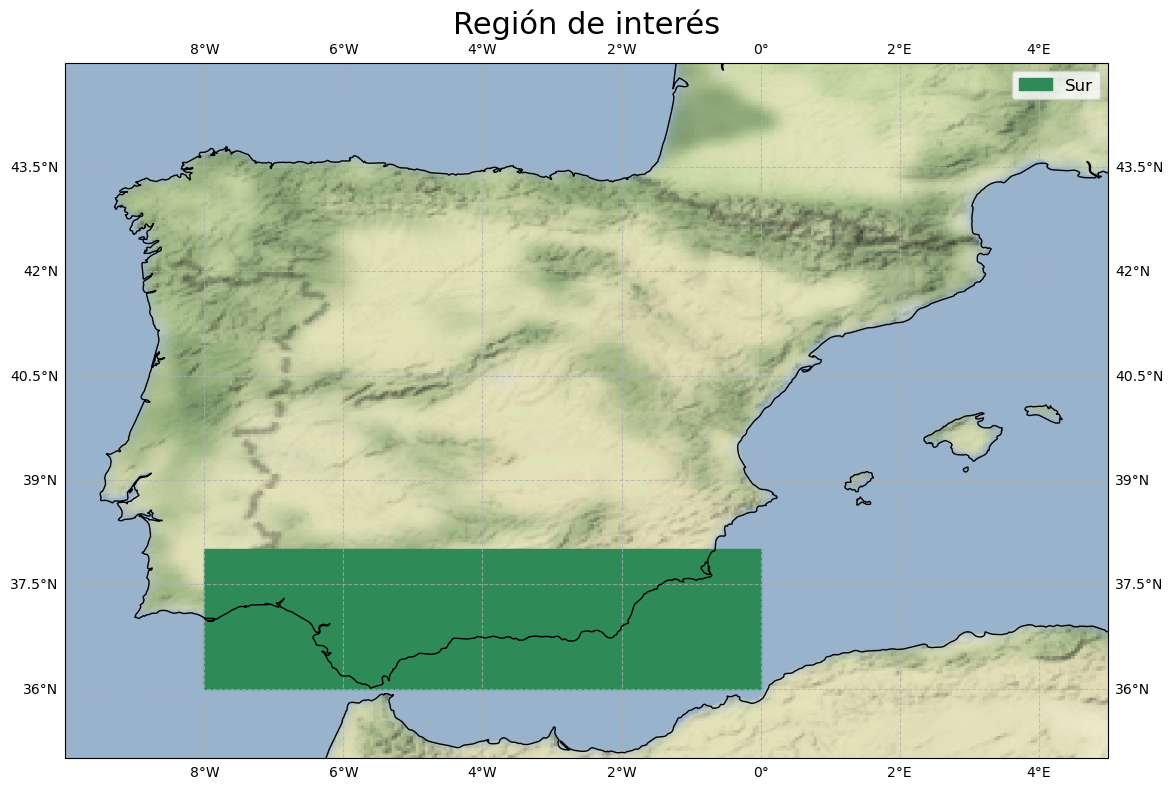

In [7]:
# Vamos a pintar las regiones en un mapa para verlas mejor


plt.style.use('default') # Estilo general
fig, ax = plt.subplots(figsize=(16, 8), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()

stamen_terrain = cimgt.Stamen('terrain-background')
zoom = 5
ax.add_image(stamen_terrain, zoom)

ax.set_global() # added following an answer to my question

ax.gridlines(draw_labels = True,linestyle='--',alpha=0.7,zorder=1)
def pinta_region(lats,lons,color,ax=ax,label=None): #Codigo de Diego
    lat_corners = np.array([lats[0], lats[0],lats[1], lats[1]])
    lon_corners = np.array([ lons[0], lons[1], lons[1], lons[0]])
    poly_corners = np.zeros((len(lat_corners), 2), np.float64)
    poly_corners[:,0] = lon_corners
    poly_corners[:,1] = lat_corners
    poly = mpatches.Polygon(poly_corners, closed=True, ec=color, fill=True, lw=1, fc=color,label=label)#, transform=ccrs.Geodetic())
    ax.add_patch(poly)

#los,las= np.meshgrid(lon_red,lat_red)
ax.set_title('Región de interés',size=22)
pinta_region([38,36],[-8,0],'seagreen',ax,label='Sur')
ax.legend(prop={'size':12})
ax.set_extent([-10,5,35,45])
#ax.plot(los,las,'k.') #para pintar la malla de puntos de los cuales hay datos
plt.tight_layout()
fig.savefig('Regiones.png',dpi=500,facecolor='w')

In [8]:
path_stations= r"C:\Users\ideapad 5 15ITL05\Desktop\Meteo UCM\1 cuatrimestre\Analisis de datos en meteorologia\Repaso python\Dia 3\isd-history.csv"
stations=pd.read_csv(path_stations)
stations[stations['CTRY']== 'SP']

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
2838,080010,99999,LA CORUNA,SP,NaN,NaN,43.367,-8.417,67.0,19310101,20201004
2839,080020,99999,A CORUNA,SP,NaN,LECO,43.302,-8.377,98.5,19741001,20201004
2840,080030,99999,MONTEVENTOSO,SP,NaN,NaN,43.483,-8.317,240.0,19730101,20050211
2841,080050,99999,EL FERROL,SP,NaN,NaN,43.483,-8.233,9.0,19730101,20051112
2842,080070,99999,CERCEDA,SP,NaN,NaN,43.167,-8.533,595.0,20040517,20060207
...,...,...,...,...,...,...,...,...,...,...,...
12729,600350,99999,FUERTEVENTURA,SP,NaN,GCFV,28.453,-13.864,25.3,19500327,20201004
12730,600400,99999,LANZAROTE,SP,NaN,GCRR,28.945,-13.605,14.3,19500310,20201004
12788,603200,99999,CEUTA,SP,NaN,NaN,35.917,-5.350,88.0,19650101,20201004
12790,603380,99999,MELILLA,SP,NaN,GEML,35.280,-2.956,47.5,19641001,20201004


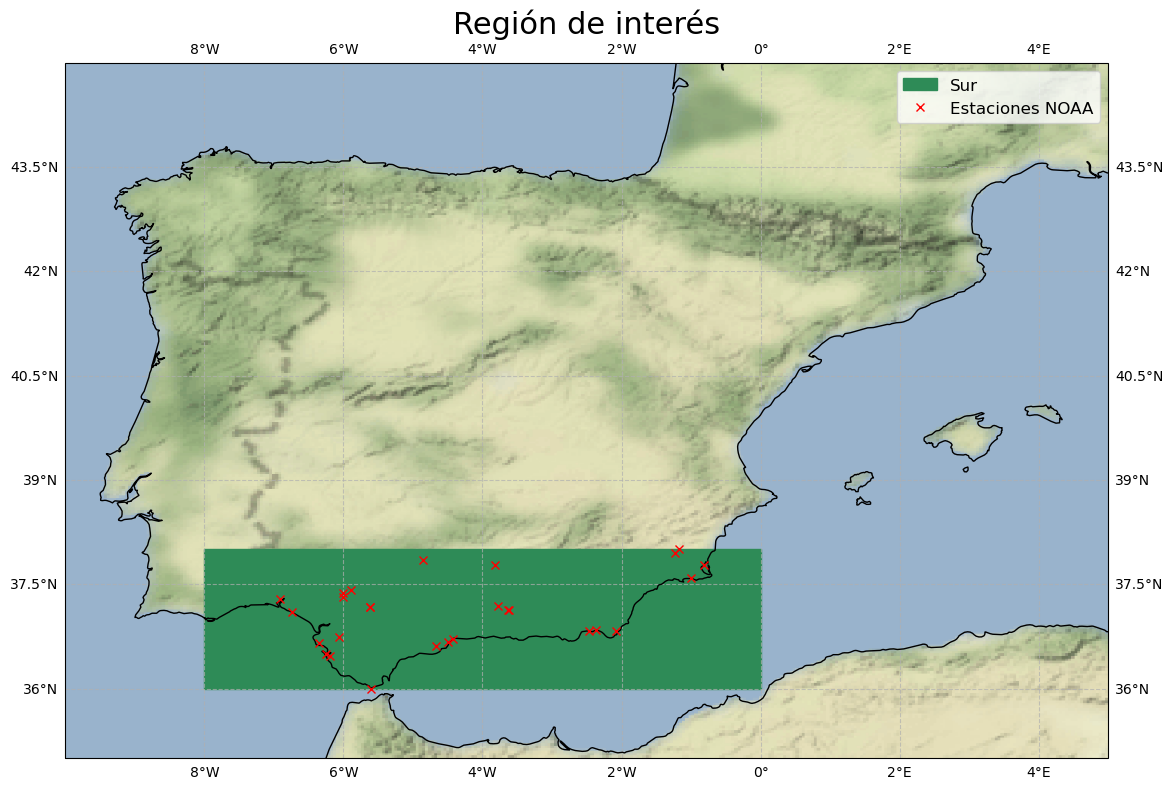

In [9]:
#Veamos aquellas estaciones que están dentrro de la región de estudio
estaciones= stations[(stations['CTRY']== 'SP')&(stations['LAT']>=lat_lims[1])&(stations['LAT']<=lat_lims[0])&(stations['LON']>=lon_lims[0])&(stations['LON']<=lon_lims[1])]
#Pintamos en el mapa anterior estas estaciones de la NOAA
fig, ax = plt.subplots(figsize=(16, 8), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()

stamen_terrain = cimgt.Stamen('terrain-background')
zoom = 5
ax.add_image(stamen_terrain, zoom)

ax.set_global() # added following an answer to my question

ax.gridlines(draw_labels = True,linestyle='--',alpha=0.7,zorder=1)

ax.set_title('Región de interés',size=22)
pinta_region([38,36],[-8,0],'seagreen',ax,label='Sur')

ax.set_extent([-10,5,35,45])
ax.plot(estaciones['LON'],estaciones['LAT'],'rx',label='Estaciones NOAA')
plt.tight_layout()
ax.legend(prop={'size':12})
fig.savefig('Regiones.png',dpi=500,facecolor='w')

In [10]:
#Comparemos los datos de una estación y del punto del set de datos más próximo:
estaciones

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
2849,080144,99999,ARMILLA,SP,NaN,LEGA,37.133,-3.636,700.1,20040525,20201004
2945,083830,99999,HUELVA,SP,NaN,NaN,37.283,-6.917,20.0,19730101,20201004
2946,083840,99999,EL ARENOSILLO,SP,NaN,NaN,37.100,-6.733,41.0,20020430,20070307
2947,083900,99999,SEVILLA/TABLADA,SP,NaN,NaN,37.367,-6.000,14.0,19730101,20051206
2948,083905,99999,SEVILLA HELIPORT,SP,NaN,LEEC,37.317,-6.000,5.0,20070629,20201002
2949,083910,99999,SEVILLA,SP,NaN,LEZL,37.418,-5.893,33.8,19730101,20201004
2950,083970,99999,MORON AB,SP,NaN,LEMO,37.175,-5.616,86.9,19580102,20201004
2951,084100,99999,CORDOBA,SP,NaN,LEBA,37.842,-4.849,90.5,19730101,20201004
2952,084170,99999,JAEN,SP,NaN,NaN,37.783,-3.817,580.0,19730201,20201004
2953,084190,99999,GRANADA,SP,NaN,LEGR,37.189,-3.777,566.9,19730101,20201004


In [11]:
#Next, we build up the code of the station (we now it already from the statement of the exercise)
def readDataFrame(stationName):
    url = r"C:\Users\ideapad 5 15ITL05\Desktop\Meteo UCM\1 cuatrimestre\Analisis de datos en meteorologia\Repaso python\Dia 3\isd-history.csv"
    c=pd.read_csv(url)

    #Seleccionamos los años de inicio y final de lectura
    yearInit = 1990
    yearEnd = 2019

    #Construimos el código que necesitamos para bajar los datos de la estación:
    station=str(c.loc[(c['STATION NAME']==stationName)]['USAF'].values[0]) + '-' + \
            str(c.loc[(c['STATION NAME']==stationName)]['WBAN'].values[0])
    print('Seleccionada la estacion ' + stationName + ' con código ' + station)

    #Definimos las columnas y el tipo de dato que va a tener el DataFrame donde vamos a alojar los datos de la estación
    colNames=['year','month','day','hour','temp','tempd','slp','windDir','windSpeed','cloud','pcp1h','pcp6h']
    dataType=['int','int','int','int','float','float','int','int','int','int','int','int',]

    #Definimos los límites de los caractéres donde están los datos en los archivos que vamos a leer 
    #(Esta información está en: https://www.ncei.noaa.gov/pub/data/noaa/isd-lite/isd-lite-format.txt)
    limits=[(0,4),(5,7),(8,10),(11,13),(14,19),(20,25),(26,31),(32,37),(38,43),(44,49),(50,55),(56,61)]
    
    #Lectura de los datos:
    isd_data=pd.DataFrame(columns=colNames)
    for iyr in range(yearInit, yearEnd, 1):
        fil='https://www.ncei.noaa.gov/pub/data/noaa/isd-lite/'+str(iyr)+'/'+station+'-'+ str(iyr)+'.gz'
        data= pd.read_fwf(fil,sep=' ',compression='gzip',head=0,
                     names=colNames,colspecs=limits)
        isd_data = pd.concat([isd_data,data])
        
    #Cambio el tipo de dato (porque los lee como objetos str y queremos que sean numéricos)
    dictType={ colNames[i] : dataType[i] for i in range(12)}
    data = isd_data.astype(dictType,copy=True)
    #Los datos missing son -9999 en la base de datos: cambiamos por NaN:
    data = data.replace(-9999,np.NaN)
    dataDailymax = data.groupby(['year','month','day']).max().drop(['hour'],axis=1).reset_index()
    dataDailymin = data.groupby(['year','month','day']).mean().drop(['hour'],axis=1).reset_index()
    dataDaily = data.groupby(['year','month','day']).mean().drop(['hour'],axis=1).reset_index()
    
    dataMonthly = data.groupby(['year','month']).mean().drop(['day'],axis=1).reset_index()
    dataYearly = data.groupby(['year']).mean().drop(['month'],axis=1).reset_index()

    
    
    return dataDailymax,dataDailymin,dataDaily, dataMonthly, dataYearly

In [12]:
station_name='GRANADA'
(max,min,daily,monthly,yearly)= readDataFrame(station_name)

Seleccionada la estacion GRANADA con código 084190-99999


Una vez hemos visualizado la región de estudio y hemos visto las estaciones meteorológicas con las que cuenta, procedemos a hacer la definición de los dos índices de extremos que vamos a analizar:
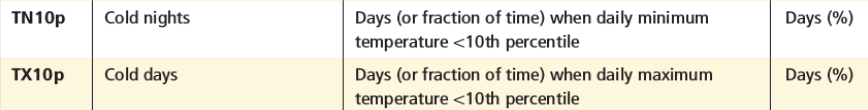

In [13]:
#Vamos a representar la temperatura equivalente al percentil 10 en la región de estudio.
cuantil1= np.quantile(min_data_red_1.tn,0.1,axis=0)
cuantil2= np.quantile(min_data_red_2.tn,0.1,axis=0)

In [14]:
cuantil1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [15]:
#plt.contourf(lon,lat,cuantil1)
minimo= np.min((np.min((np.ma.masked_array(cuantil1, np.isnan(cuantil1)))),np.min((np.ma.masked_array(cuantil2, np.isnan(cuantil2))))))
maximo= np.max((np.max((np.ma.masked_array(cuantil1, np.isnan(cuantil1)))),np.max((np.ma.masked_array(cuantil2, np.isnan(cuantil2))))))

In [16]:
np.round(2.6)

3.0

C:\Anaconda\envs\analisisdatosucm\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Anaconda\envs\analisisdatosucm\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


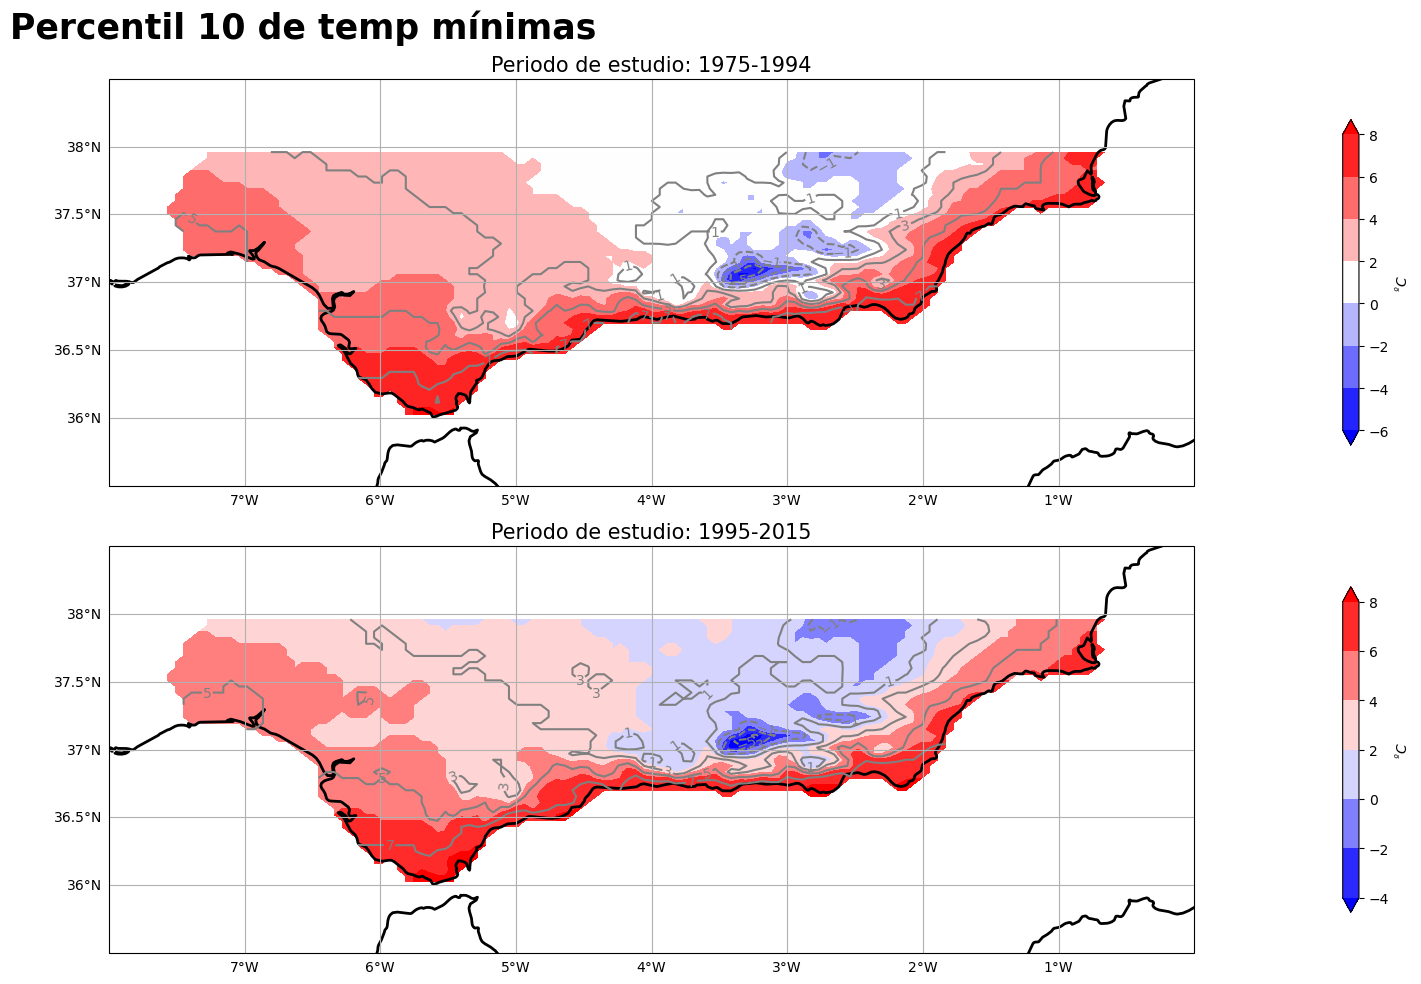

In [17]:
def DibujoMapados(lon,lat,var1,var2,mapbar,unidades,subtitulo1,subtitulo2,figura):
    fig = plt.figure(figsize=(30,10), tight_layout=True) 
    ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
    ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
    fig.suptitle('Percentil 10 de temp mínimas',fontsize=25, weight='bold')
    
    minimo= np.min((np.min((np.ma.masked_array(var1, np.isnan(var1)))),np.min((np.ma.masked_array(var2, np.isnan(var2))))))
    maximo= 1.01* np.max((np.max((np.ma.masked_array(var1, np.isnan(var1)))),np.max((np.ma.masked_array(var2, np.isnan(var2))))))
    levels=np.arange(np.round(minimo),np.round(maximo),2)
     
    im=ax1.contourf(lon,lat,var1, cmap = mapbar, extend='both')
    ax1.coastlines(linewidth = 2)
    gl=ax1.gridlines(draw_labels = True)
    gl.ylabels_right = False
    gl.xlabels_top = False
    fig.colorbar(im,ax=ax1,shrink=0.8, label = unidades,orientation='vertical')
    im2=ax1.contour(lon,lat,var1,levels, colors='gray')
    ax1.clabel(im2, im2.levels, inline=True, fontsize=10)
    ax1.set_extent([-8,0,35.5,38.5])
    ax1.set_title(subtitulo1,fontsize=15)
    
    im3=ax2.contourf(lon,lat,var2, cmap = mapbar, extend='both')
    ax2.coastlines(linewidth = 2)
    gl=ax2.gridlines(draw_labels = True)
    gl.ylabels_right = False
    gl.xlabels_top = False
    fig.colorbar(im3,ax=ax2,shrink=0.8, label = unidades,orientation='vertical')
    im4=ax2.contour(lon,lat,var2,levels, colors='gray')
    ax2.clabel(im4, im4.levels, inline=True, fontsize=10)
    ax2.set_extent([-8,0,35.5,38.5])
    ax2.set_title(subtitulo2,fontsize=15)
    fig.savefig(figura)


lat= min_data_red_1.lat
lon= min_data_red_1.lon



mapbar='bwr'
subtitulo1='Periodo de estudio: 1975-1994'
subtitulo2='Periodo de estudio: 1995-2015'
unidades='$^{º}C$'
figura='Percentil 10 de temp mínimas.png'
DibujoMapados(lon,lat,cuantil1,cuantil2,mapbar,unidades,subtitulo1,subtitulo2,figura)


In [18]:
#Definimos el periodo para determinar los cuantiles como el 1975-1994
#Buscamos el porcentaje de días que la temp es inferior a dicho cuantil
cuantil= cuantil1
num_cold1= np.sum(np.where(min_data_red_1.tn<cuantil,1,0),axis=0)
num_cold2= np.sum(np.where(min_data_red_2.tn<cuantil,1,0),axis=0)
n= min_data_red_1.tn.shape[0]
por1= num_cold1*100/n
por2= num_cold2*100/n
mini= np.min((np.min(por1),np.min(por2)))
maxi= np.max((np.max(por1),np.max(por2)))

Text(0.5, 0.98, 'Porcentaje de noches frías definiendo el percentil con el primer periodo')

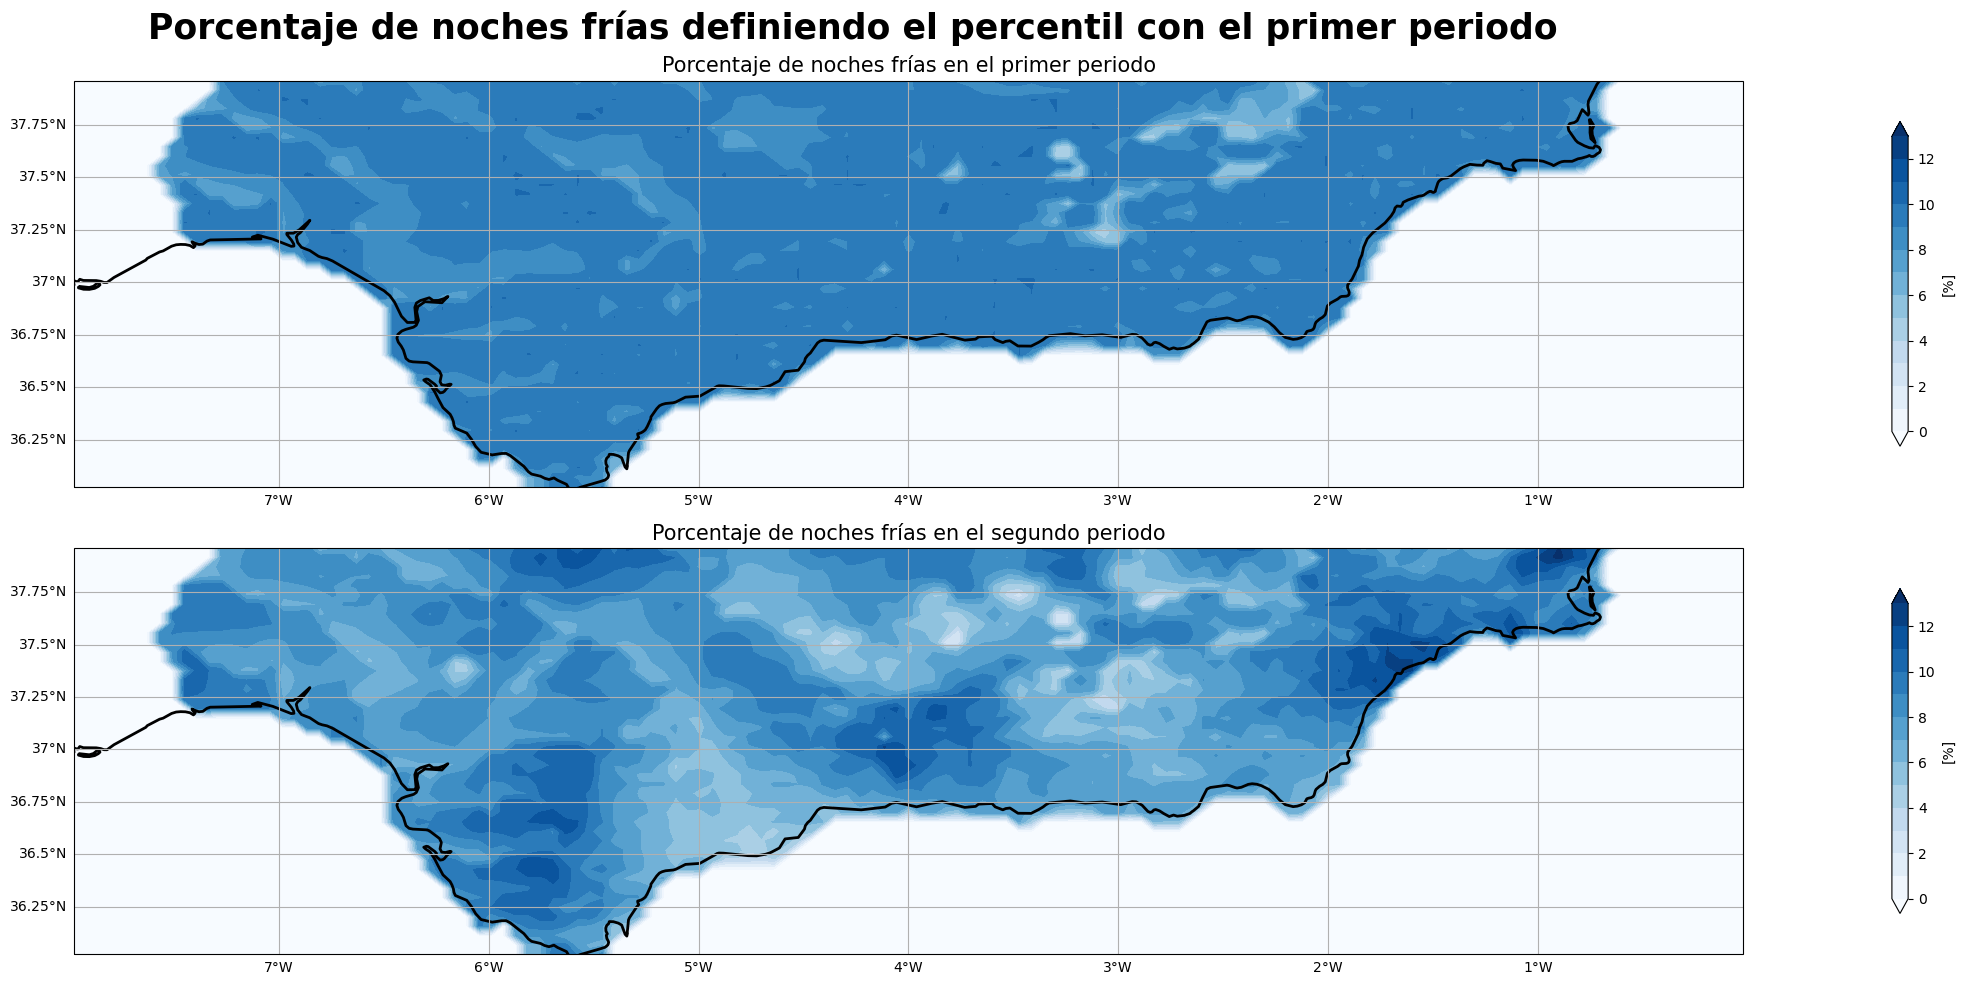

In [19]:
#Representamos el porcentaje para cada punto de la malla de datos
fig = plt.figure(figsize=(30,10), tight_layout=True) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
cbarticks = np.arange(mini,maxi,1)

ax1.coastlines(linewidth = 2)
gl=ax1.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False
ax2.coastlines(linewidth = 2)
gl=ax2.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False

 
cmap= 'Blues'
unidades= '[%]'
#im=ax1.contourf(lon,lat,por1, cbarticks,cmap = cmap, extend='both', vmin = mini, vmax = maxi)
im=ax1.contourf(lon,lat,por1,cbarticks,cmap = cmap, extend='both', vmin = mini, vmax = maxi)

im2=ax2.contourf(lon,lat,por2, cbarticks,cmap = cmap, extend='both', vmin = mini, vmax = maxi)
fig.colorbar(im,ax=ax1,shrink=0.8, label=unidades,orientation='vertical')
fig.colorbar(im2,ax=ax2,shrink=0.8, label=unidades,orientation='vertical')
ax1.set_title('Porcentaje de noches frías en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de noches frías en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de noches frías definiendo el percentil con el primer periodo',fontsize=25, weight='bold')


Text(0.5, 0.98, 'Porcentaje de noches frías definiendo el percentil con el segundo periodo')

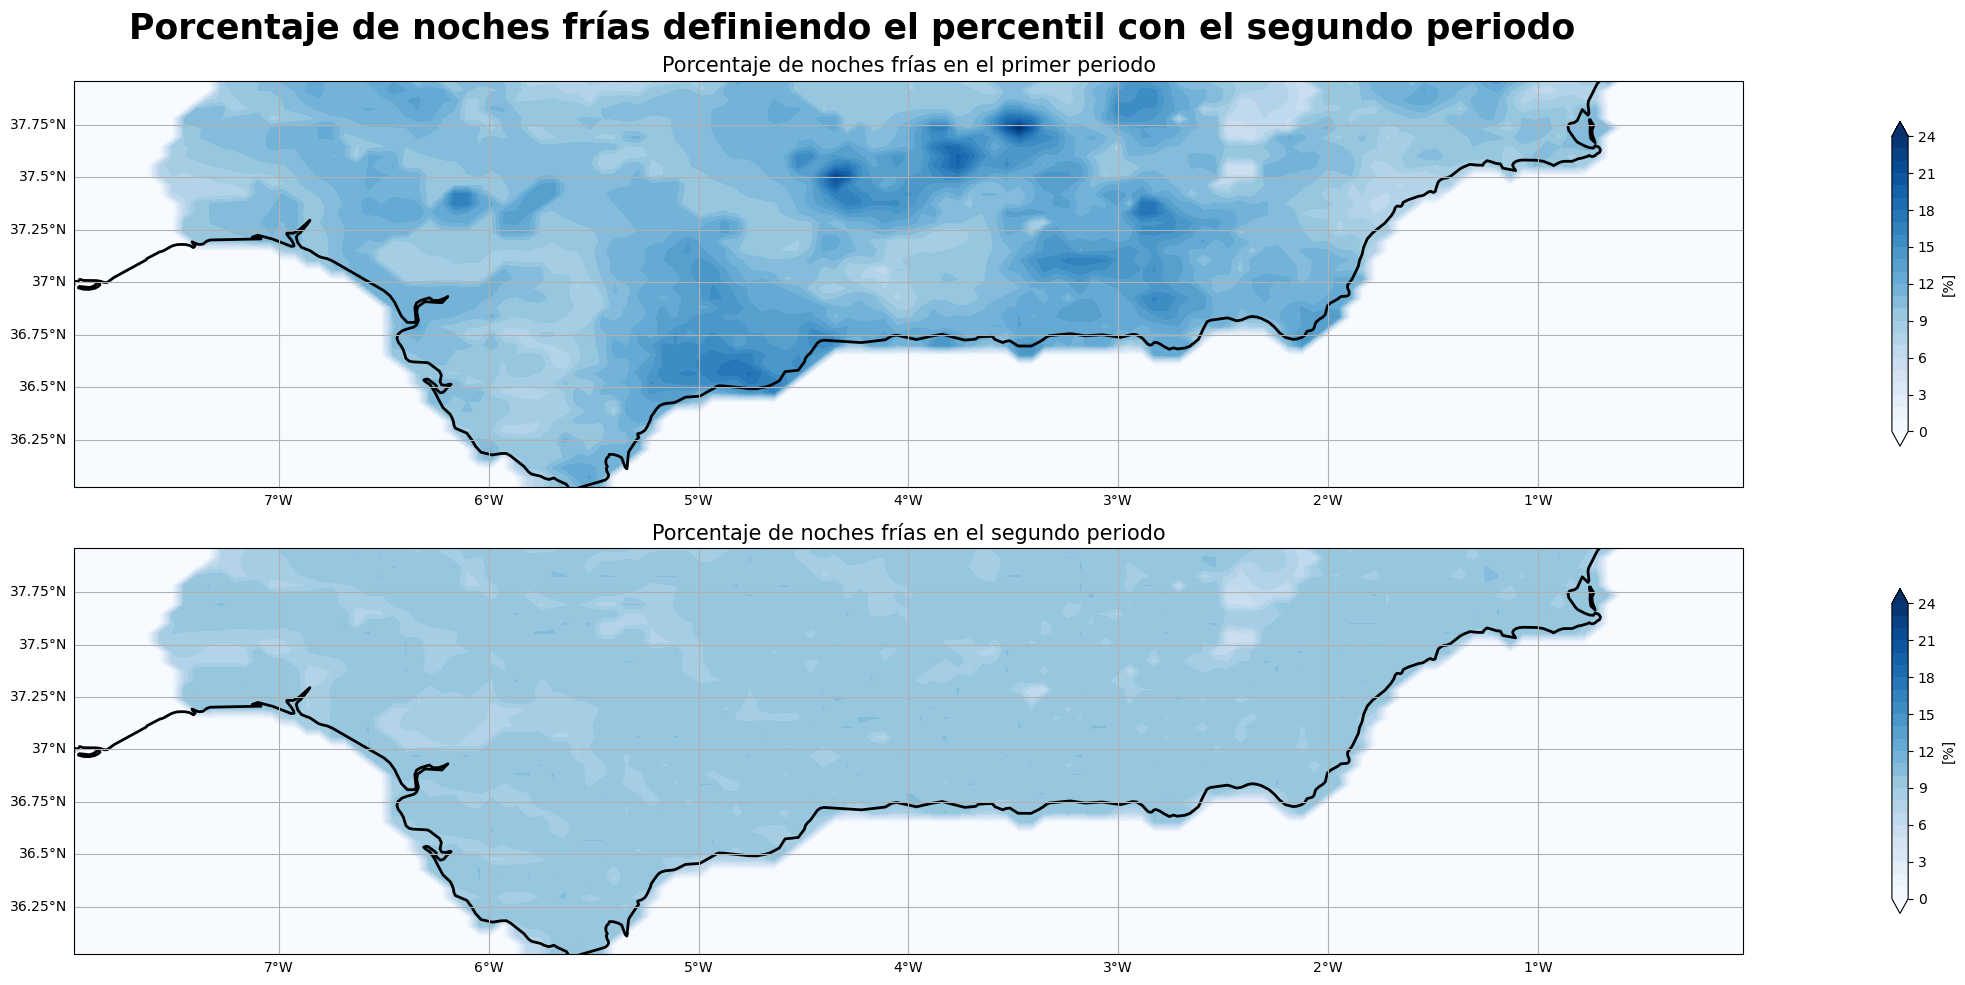

In [20]:
cuantil= cuantil2
num_cold1= np.sum(np.where(min_data_red_1.tn<cuantil,1,0),axis=0)
num_cold2= np.sum(np.where(min_data_red_2.tn<cuantil,1,0),axis=0)
n= min_data_red_1.tn.shape[0]
por1= num_cold1*100/n
por2= num_cold2*100/n
mini= np.min((np.min(por1),np.min(por2)))
maxi= np.max((np.max(por1),np.max(por2)))

fig = plt.figure(figsize=(30,10), tight_layout=True) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
cbarticks = np.arange(mini,maxi,1)

ax1.coastlines(linewidth = 2)
gl=ax1.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False
ax2.coastlines(linewidth = 2)
gl=ax2.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False

 
cmap= 'Blues'
unidades= '[%]'
#im=ax1.contourf(lon,lat,por1, cbarticks,cmap = cmap, extend='both', vmin = mini, vmax = maxi)
im=ax1.contourf(lon,lat,por1,cbarticks,cmap = cmap, extend='both', vmin = mini, vmax = maxi)

im2=ax2.contourf(lon,lat,por2, cbarticks,cmap = cmap, extend='both', vmin = mini, vmax = maxi)
fig.colorbar(im,ax=ax1,shrink=0.8, label=unidades,orientation='vertical')
fig.colorbar(im2,ax=ax2,shrink=0.8, label=unidades,orientation='vertical')
ax1.set_title('Porcentaje de noches frías en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de noches frías en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de noches frías definiendo el percentil con el segundo periodo',fontsize=25, weight='bold')

### Invierno

In [21]:
#max_data_red= max_data.sel(lon=slice(lon_lims[0],lon_lims[1]),lat=slice(lat_lims[0],lat_lims[1]),Time=slice('1975','2015'))
invierno1= min_data_red_1.tn[min_data_red_1['Time.season']=='DJF',:,:].squeeze()
invierno2= min_data_red_2.tn[min_data_red_2['Time.season']=='DJF',:,:].squeeze()
#Calculamos el cuantil con todo el periodo
alldata_inv= min_data_red.tn[min_data_red['Time.season']=='DJF',:,:].squeeze()
cuantil_inv= np.quantile(alldata_inv,0.1,axis=0)
cuantil_inv.shape

(44, 137)

In [23]:
invierno1['Time.year']
n_cold_days_inv_1= np.zeros(20)
n_cold_days_inv_2= np.zeros(21)

#num_cold1_inv= np.sum(np.where(min_data_red_1.tn<cuantil,1,0),axis=0)
#n= min_data_red_1.tn.shape[0]
#por1= num_cold1*100/n

s=0
for i in range(1975,1995):
    n_cold_days_inv_1[s]= np.mean(np.sum(np.where(invierno1[invierno1['Time.year']==i]<cuantil_inv,1,0),axis=0))
    s+=1
l=0    
for i in range(1995,2016):
    n_cold_days_inv_2[l]= np.mean(np.sum(np.where(invierno2[invierno2['Time.year']==i]<cuantil_inv,1,0),axis=0))
    l+=1 
    
n_days_inv= invierno1[invierno1['Time.year']==1975,:,:].shape[0]
perc_cold_days_1= (n_cold_days_inv_1/n_days_inv)*100
perc_cold_days_2= (n_cold_days_inv_2/n_days_inv)*100

Text(0.5, 0.98, 'Porcentaje de noches frías en invierno definiendo el percentil el periodo completo')

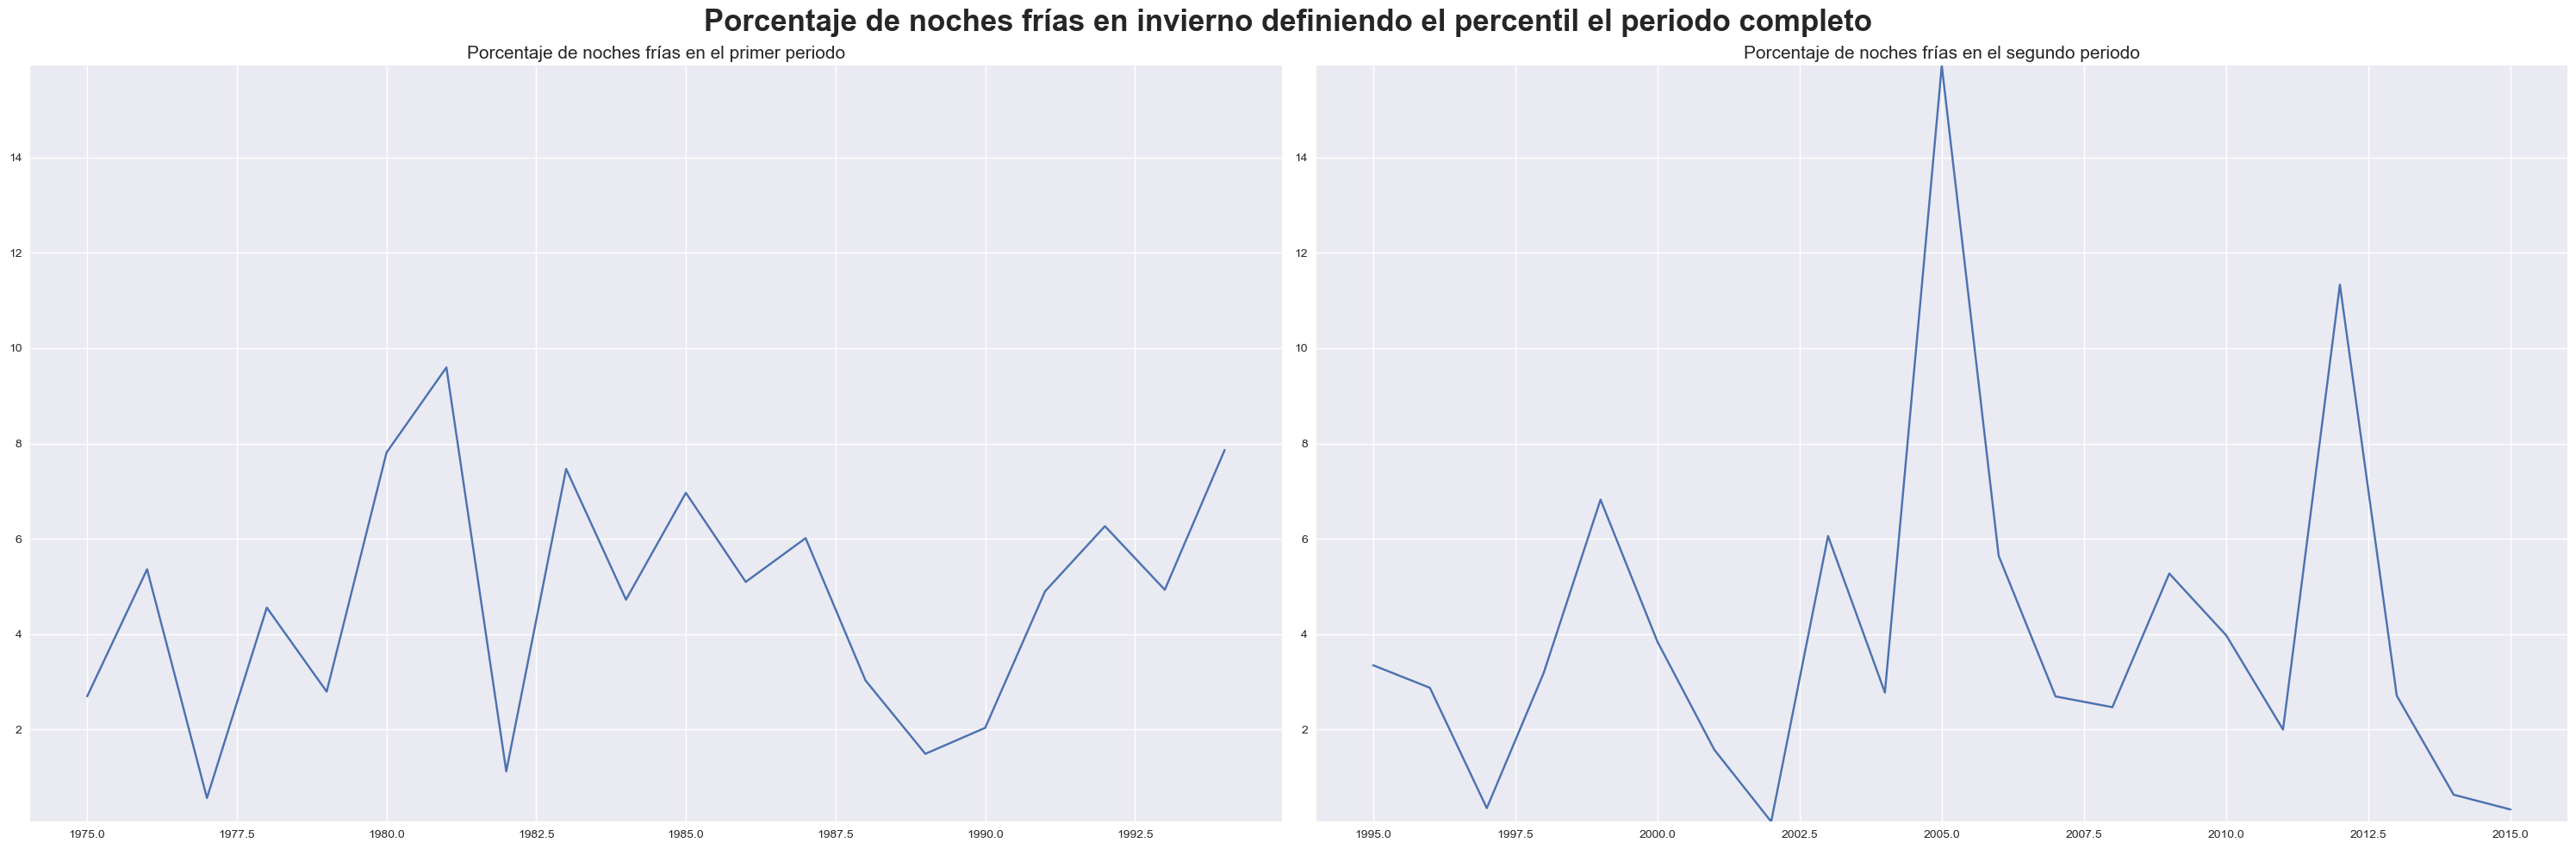

In [24]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(30,10), tight_layout=True) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

period1= np.arange(1975,1995,1)
period2= np.arange(1995,2016,1)
ax1.plot(period1,perc_cold_days_1)
ax2.plot(period2,perc_cold_days_2)
maximo= np.max((np.max(perc_cold_days_1),np.max(perc_cold_days_2)))
minimo= np.min((np.min(perc_cold_days_1),np.min(perc_cold_days_2)))
ax1.set_ylim(minimo,maximo)
ax2.set_ylim(minimo,maximo)
ax1.set_title('Porcentaje de noches frías en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de noches frías en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de noches frías en invierno definiendo el percentil el periodo completo',fontsize=25, weight='bold')

20

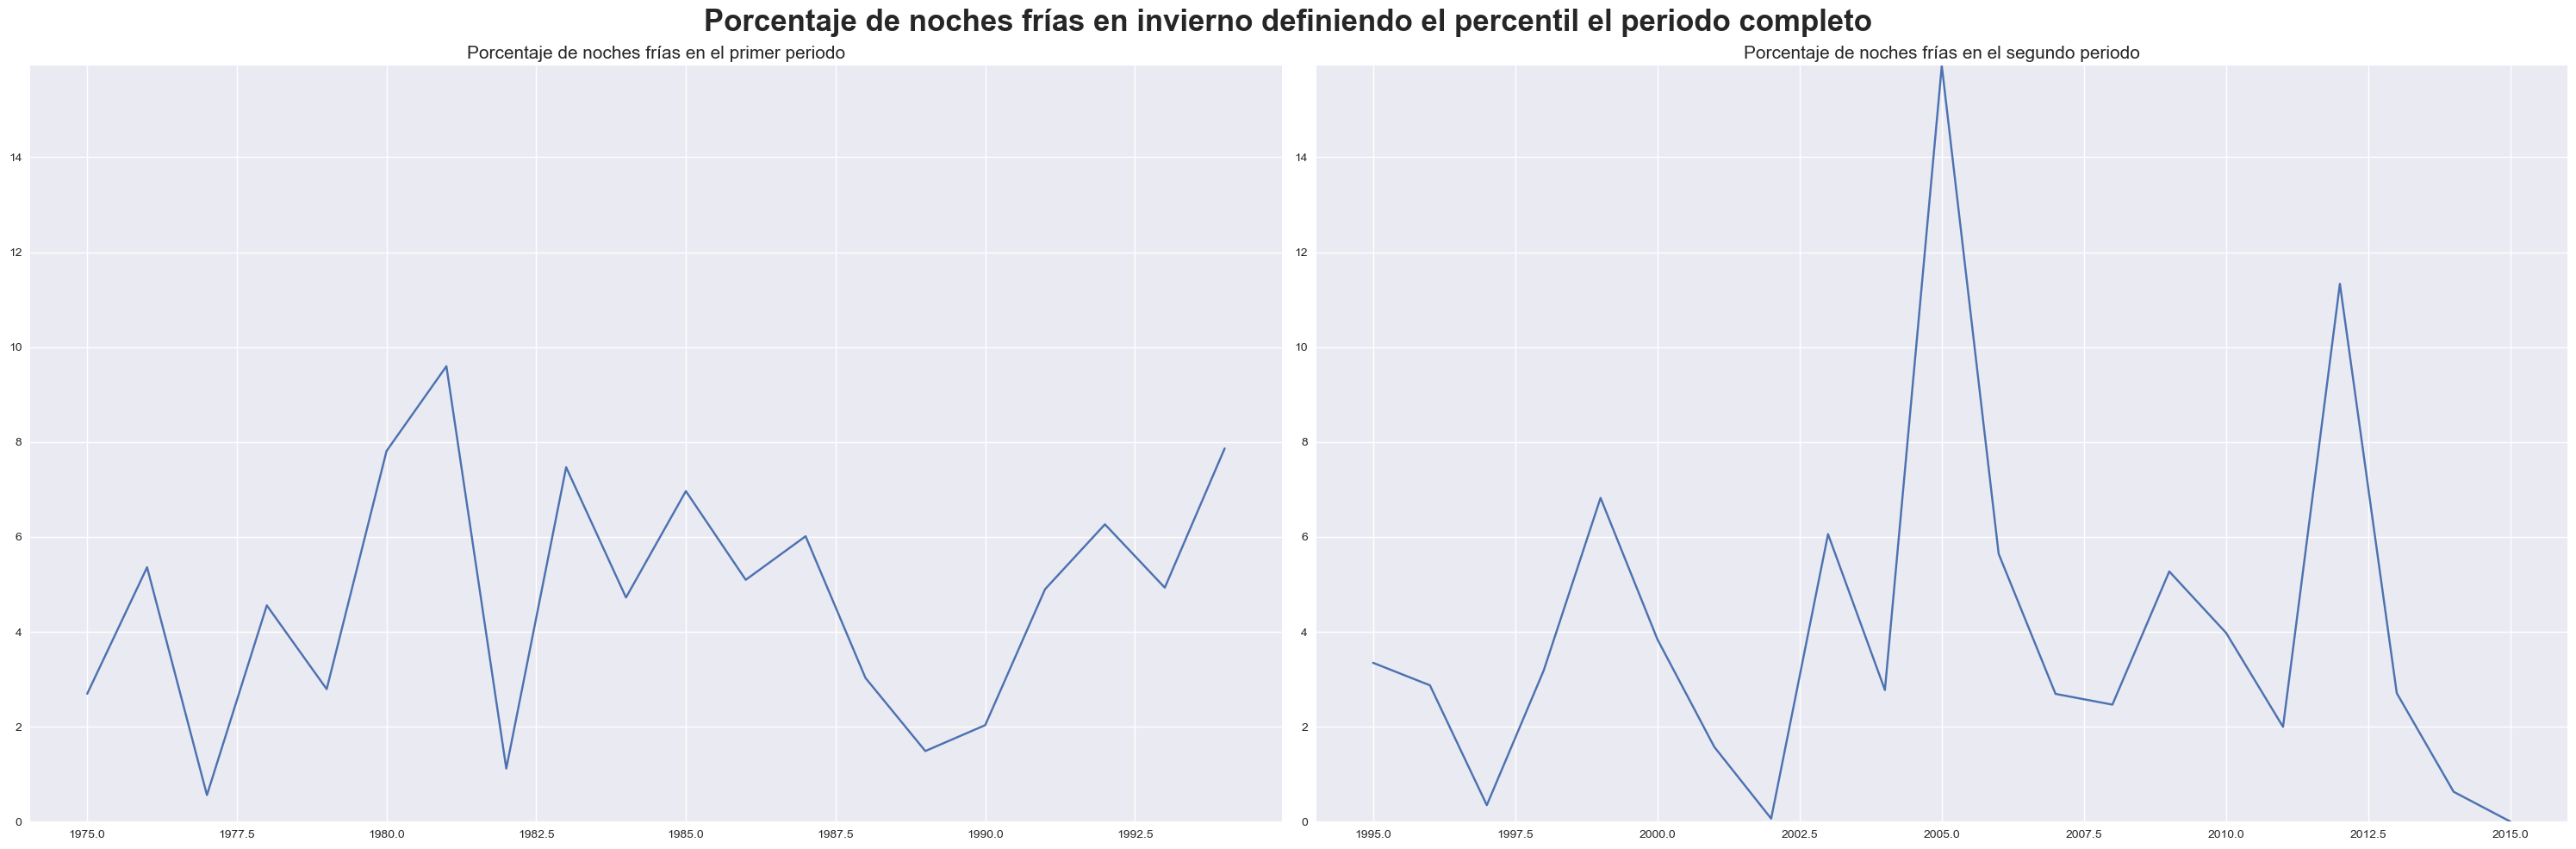

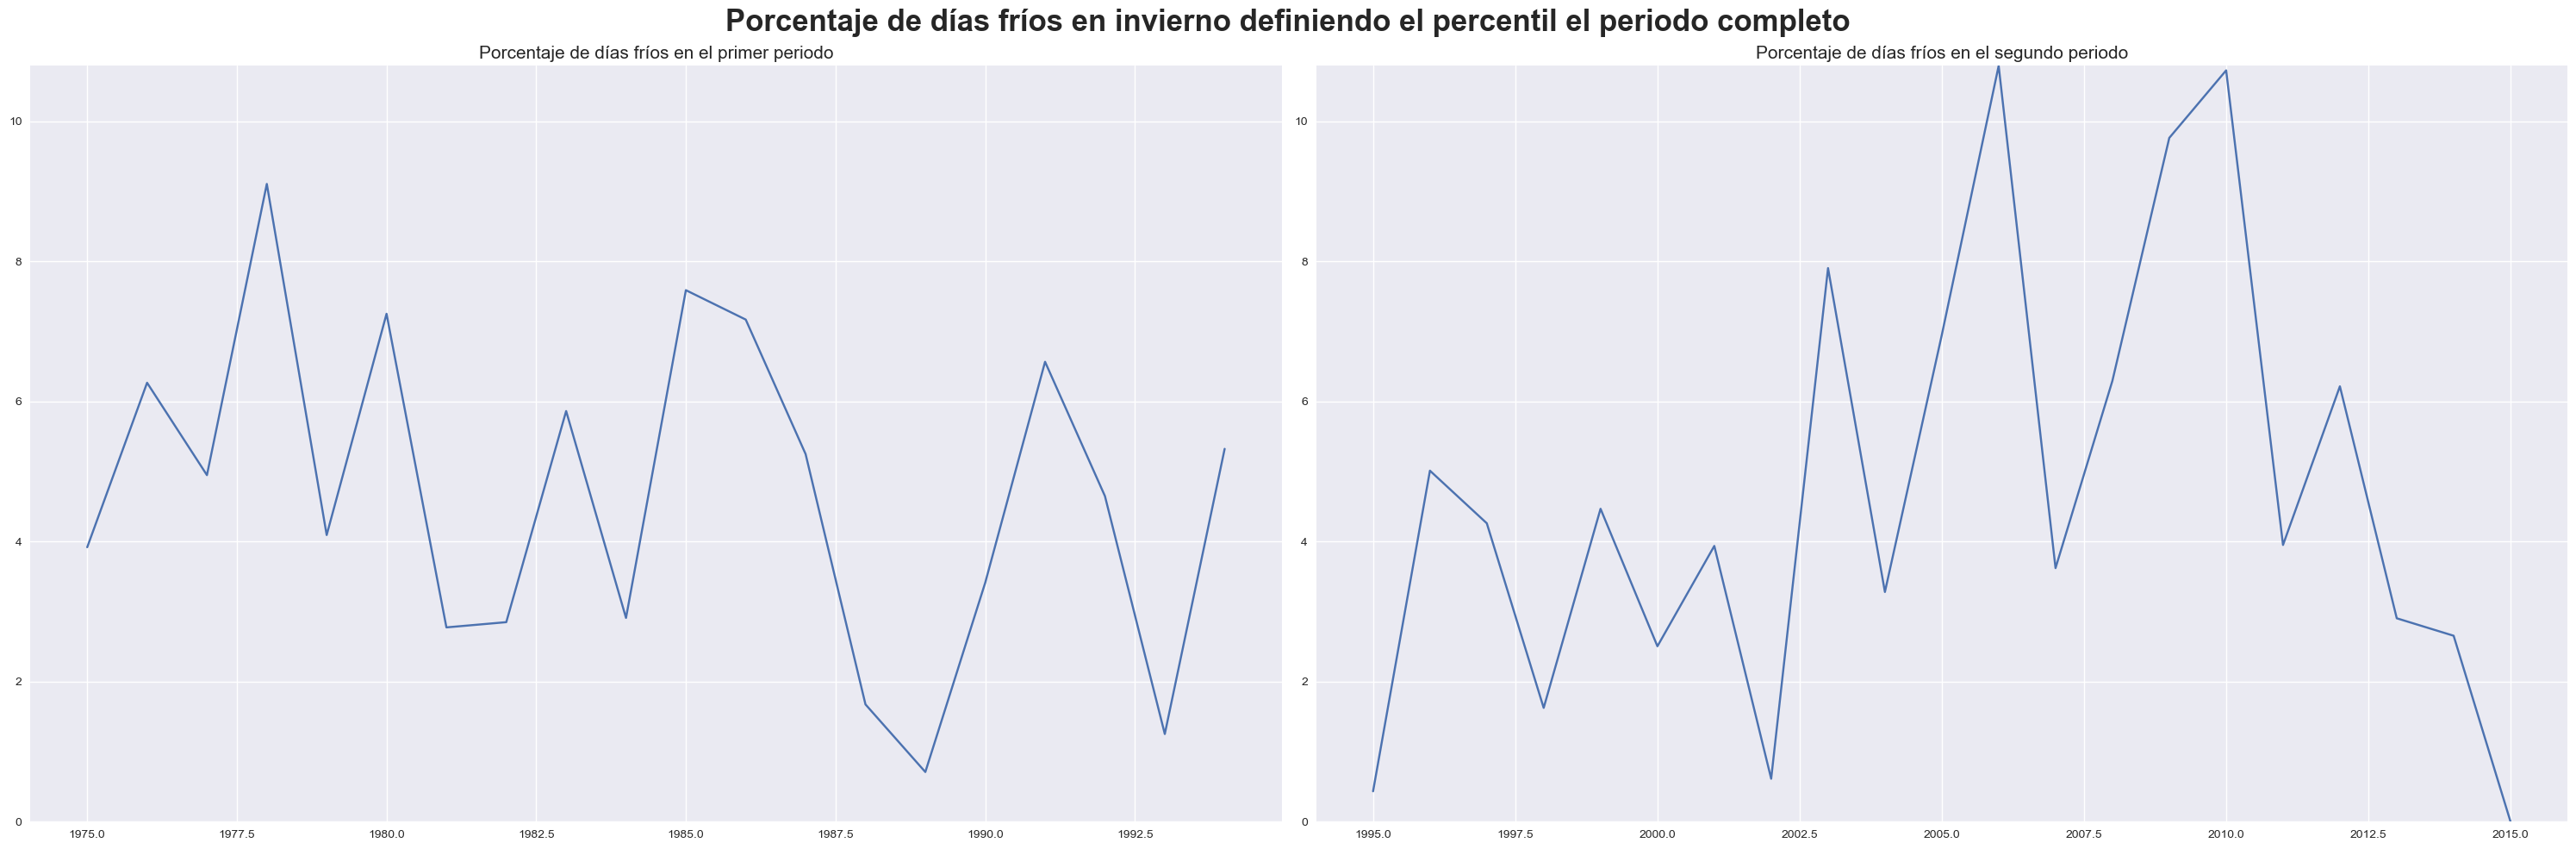

In [36]:
def cold_days_percentage(allperiod,period1, period2, season,subtitle1,subtitle2,title,cold_nights=True):
    if cold_nights==True:
        invierno1= period1.tn[period1['Time.season']==season,:,:].squeeze()
        invierno2= period2.tn[period2['Time.season']==season,:,:].squeeze()
        alldata_inv= allperiod.tn[allperiod['Time.season']==season,:,:].squeeze()
    else:   
        invierno1= period1.tx[period1['Time.season']==season,:,:].squeeze()
        invierno2= period2.tx[period2['Time.season']==season,:,:].squeeze()
        alldata_inv= allperiod.tx[allperiod['Time.season']==season,:,:].squeeze()
        
    cuantil_inv= np.quantile(alldata_inv,0.1,axis=0)
    n_cold_days_inv_1= np.zeros(20)
    n_cold_days_inv_2= np.zeros(21)


    s=0
    for i in range(1975,1995):
        n_cold_days_inv_1[s]= np.mean(np.sum(np.where(invierno1[invierno1['Time.year']==i]<cuantil_inv,1,0),axis=0))
        s+=1
    l=0    
    for i in range(1995,2015):
        n_cold_days_inv_2[l]= np.mean(np.sum(np.where(invierno2[invierno2['Time.year']==i]<cuantil_inv,1,0),axis=0))
        l+=1 

    n_days_inv= invierno1[invierno1['Time.year']==1975,:,:].shape[0]
    perc_cold_days_1= (n_cold_days_inv_1/n_days_inv)*100
    perc_cold_days_2= (n_cold_days_inv_2/n_days_inv)*100
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(30,10), tight_layout=True) 
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    period1= np.arange(1975,1995,1)
    period2= np.arange(1995,2016,1)
    ax1.plot(period1,perc_cold_days_1)
    ax2.plot(period2,perc_cold_days_2)
    maximo= np.max((np.max(perc_cold_days_1),np.max(perc_cold_days_2)))
    minimo= np.min((np.min(perc_cold_days_1),np.min(perc_cold_days_2)))
    ax1.set_ylim(minimo,maximo)
    ax2.set_ylim(minimo,maximo)
    ax1.set_title(subtitle1,fontsize=15)
    ax2.set_title(subtitle2,fontsize=15)
    fig.suptitle(title,fontsize=25, weight='bold')

subtitle1= 'Porcentaje de noches frías en el primer periodo'
subtitle2= 'Porcentaje de noches frías en el segundo periodo'
title= 'Porcentaje de noches frías en invierno definiendo el percentil el periodo completo'
subtitle12= 'Porcentaje de días fríos en el primer periodo'
subtitle22= 'Porcentaje de días fríos en el segundo periodo'
title2= 'Porcentaje de días fríos en invierno definiendo el percentil el periodo completo' 

cold_days_percentage(min_data_red, min_data_red_1, min_data_red_2,'DJF',subtitle1,subtitle2,title)
cold_days_percentage(max_data_red, max_data_red_1, max_data_red_2,'DJF',subtitle12,subtitle22,title2,cold_nights=False)

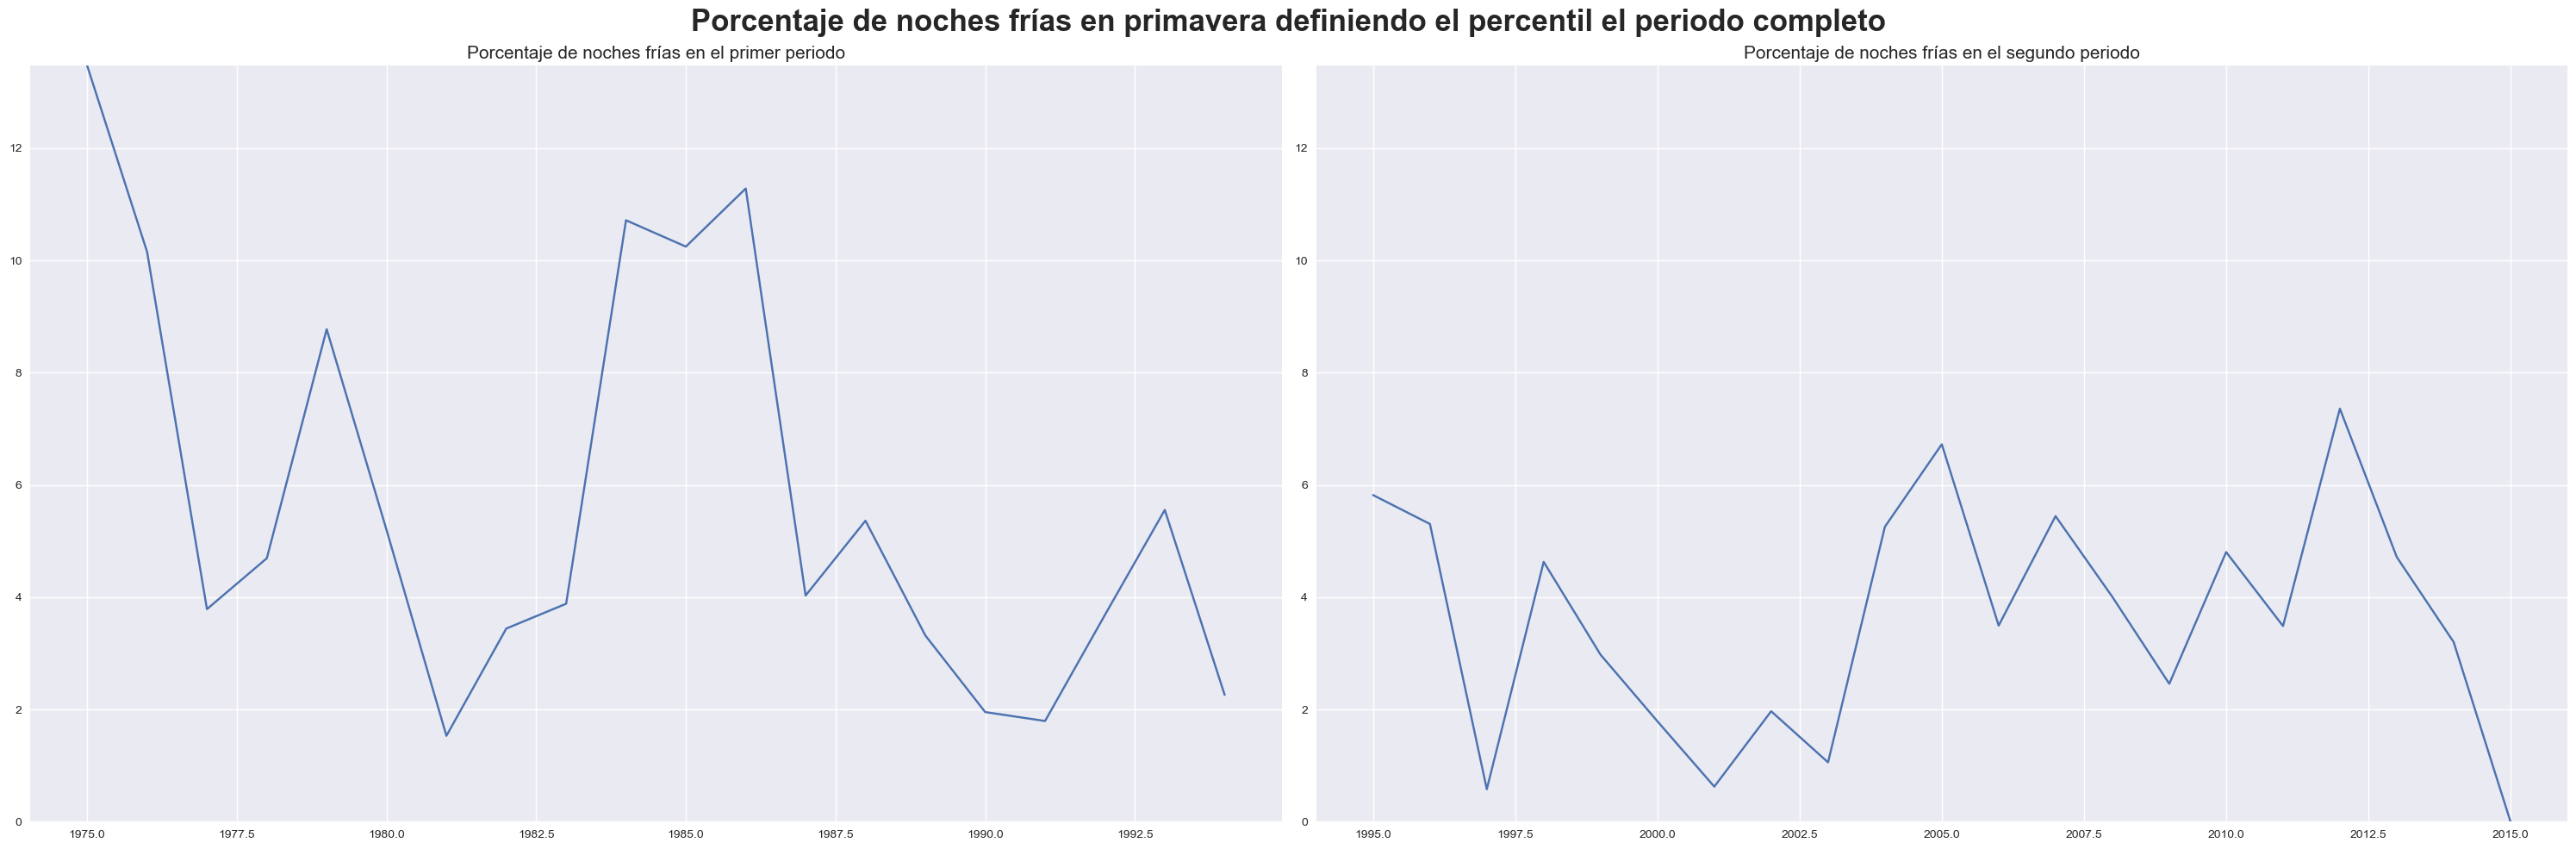

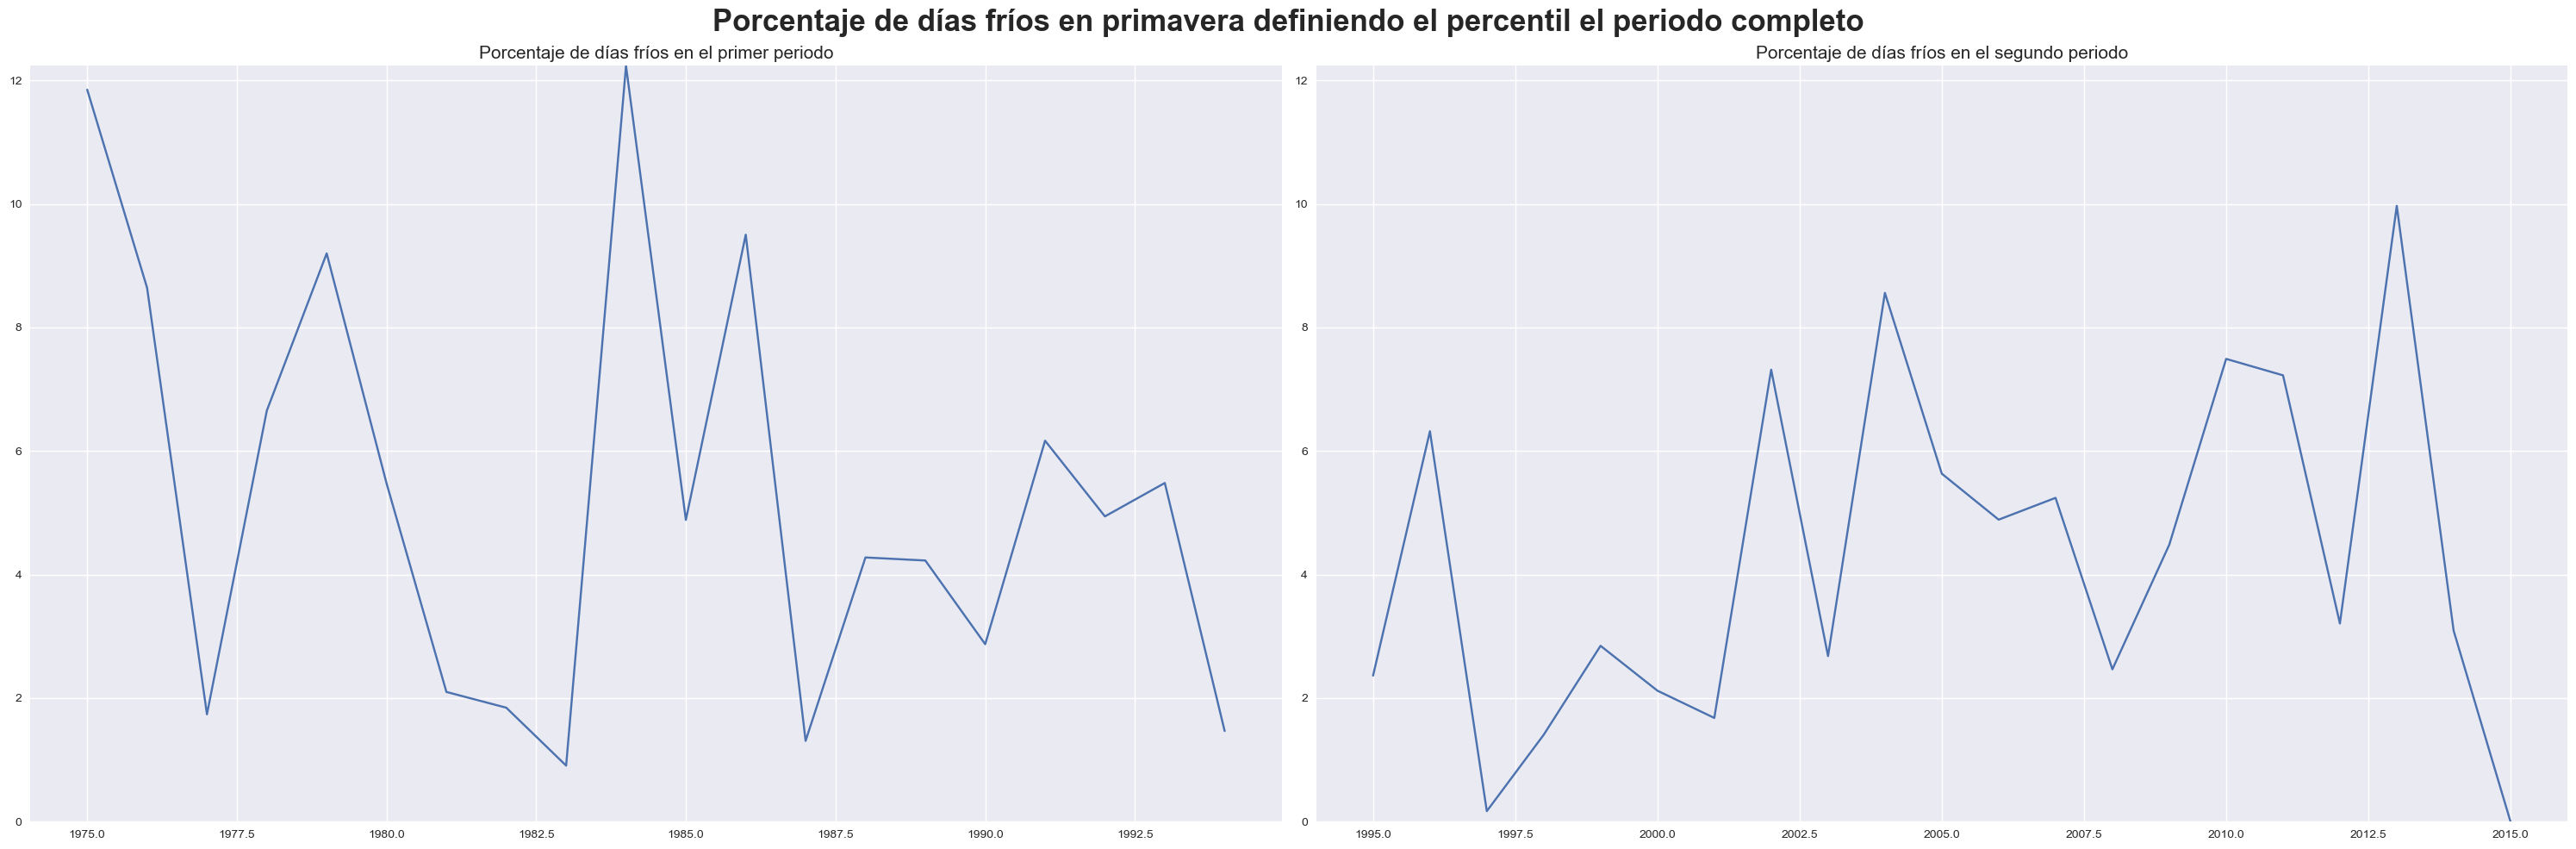

In [37]:
title= 'Porcentaje de noches frías en primavera definiendo el percentil el periodo completo'
title2= 'Porcentaje de días fríos en primavera definiendo el percentil el periodo completo'

cold_days_percentage(min_data_red, min_data_red_1, min_data_red_2,'MAM',subtitle1,subtitle2,title)
cold_days_percentage(max_data_red, max_data_red_1, max_data_red_2,'MAM',subtitle12,subtitle22,title2,cold_nights=False)

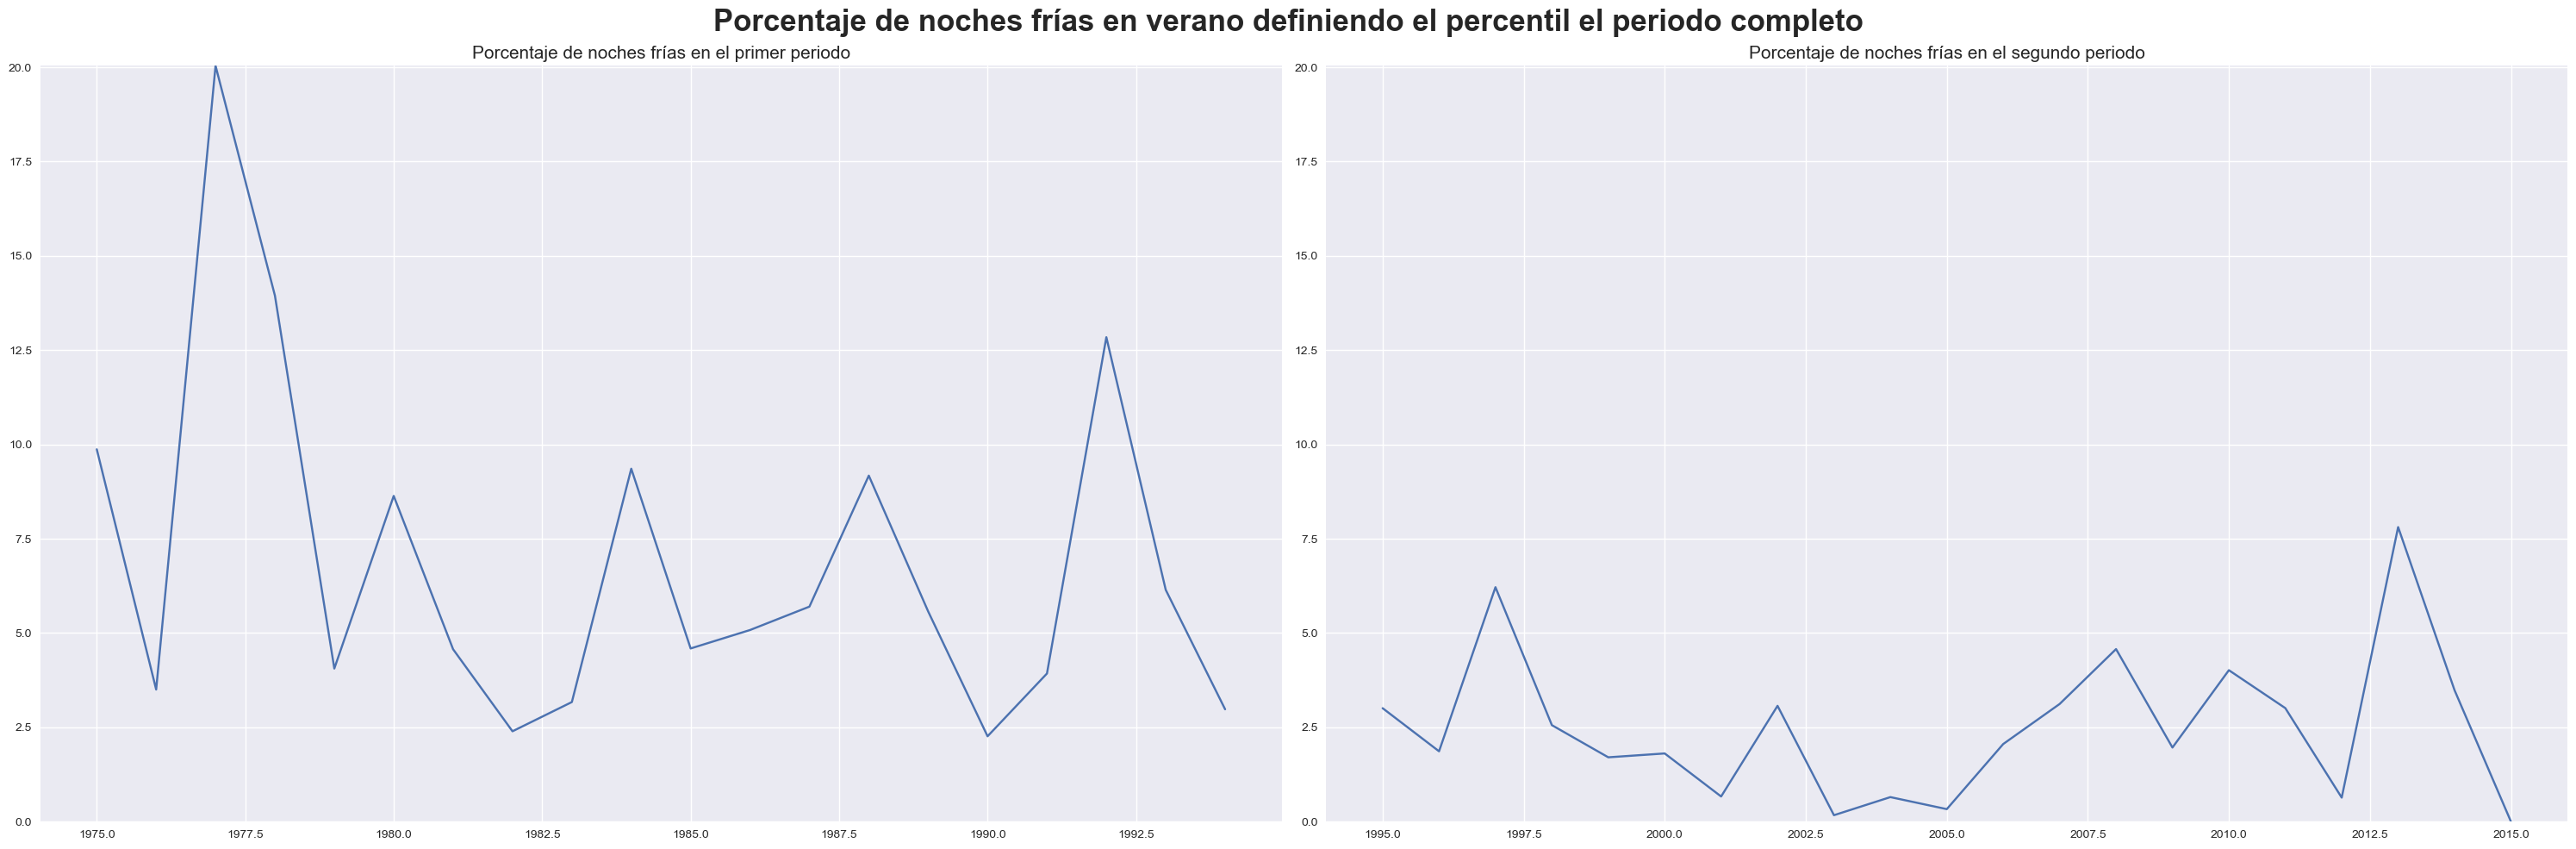

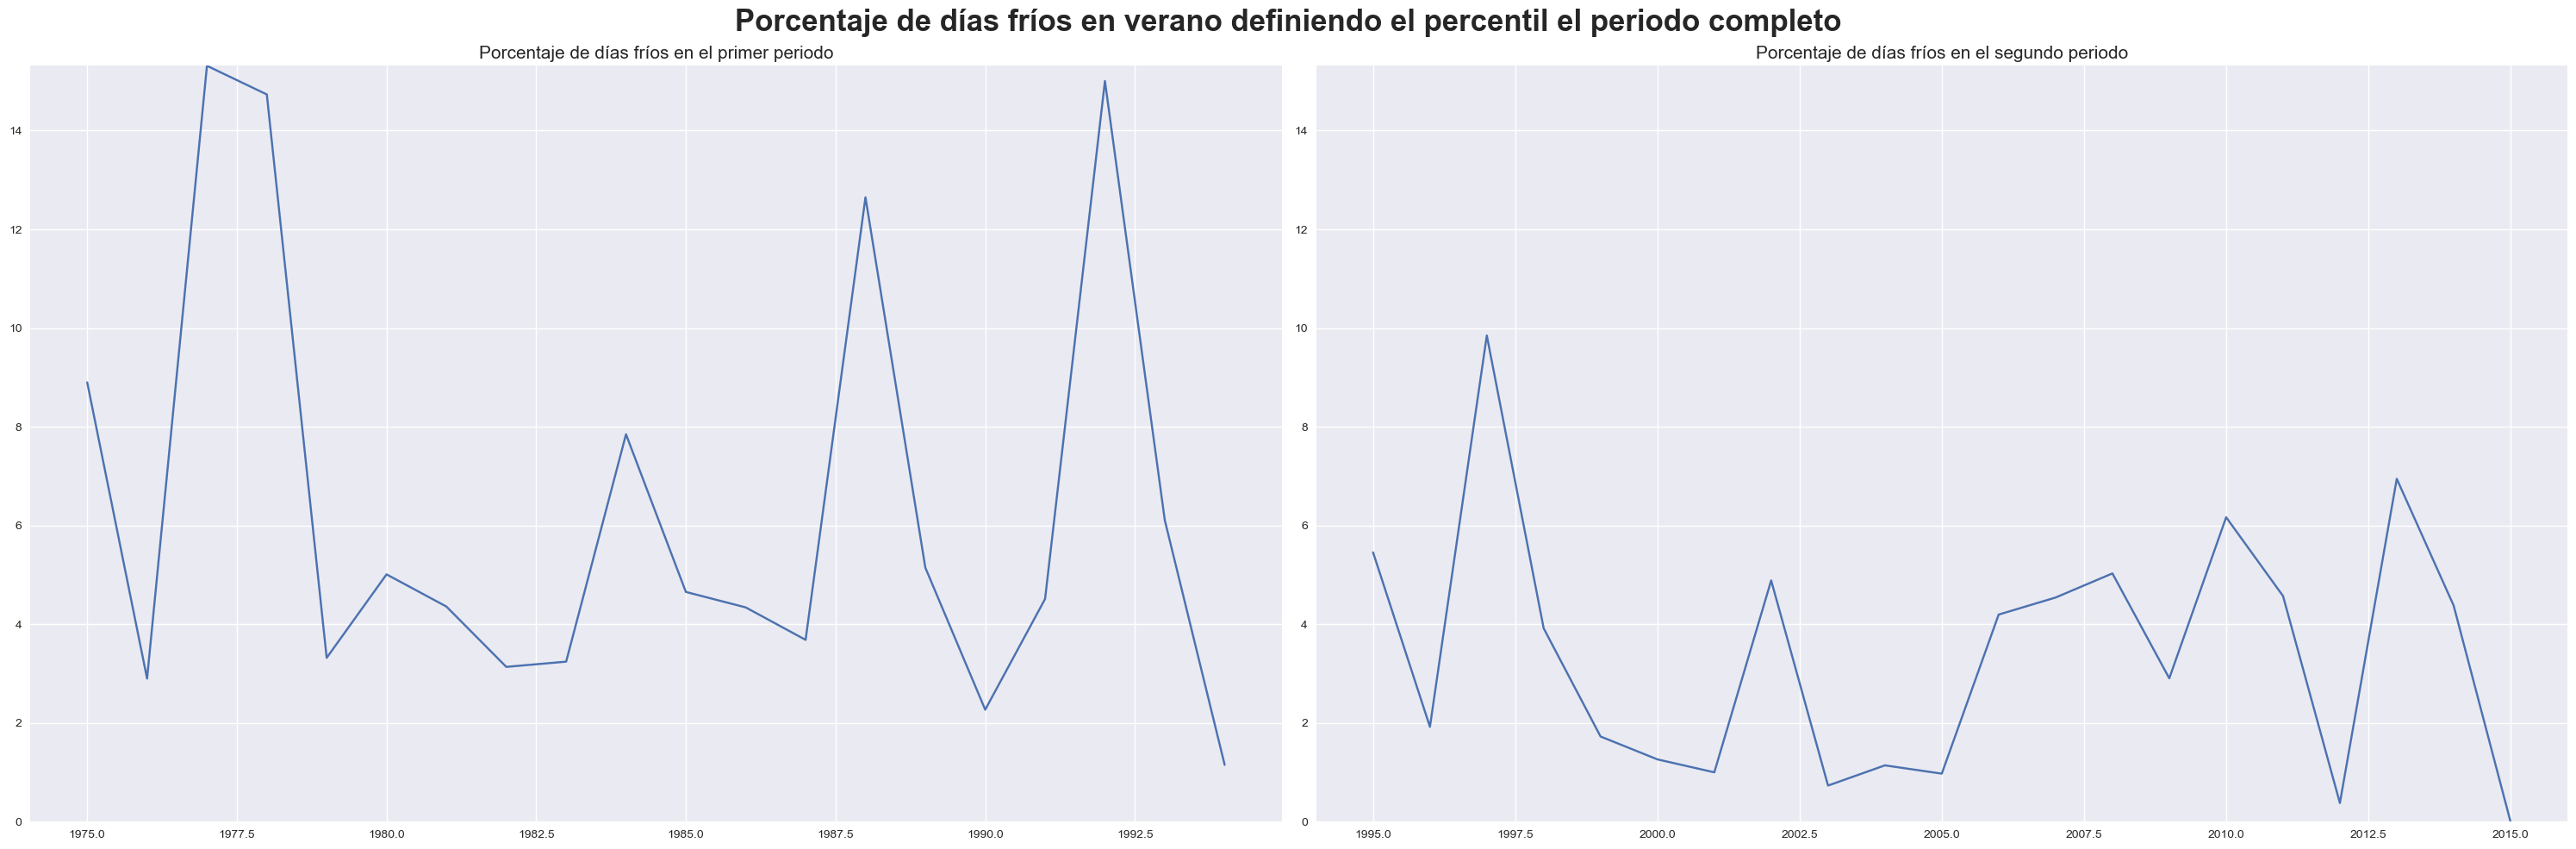

In [38]:
title= 'Porcentaje de noches frías en verano definiendo el percentil el periodo completo'
title2= 'Porcentaje de días fríos en verano definiendo el percentil el periodo completo'

cold_days_percentage(min_data_red, min_data_red_1, min_data_red_2,'JJA',subtitle1,subtitle2,title)
cold_days_percentage(max_data_red, max_data_red_1, max_data_red_2,'JJA',subtitle12,subtitle22,title2,cold_nights=False)


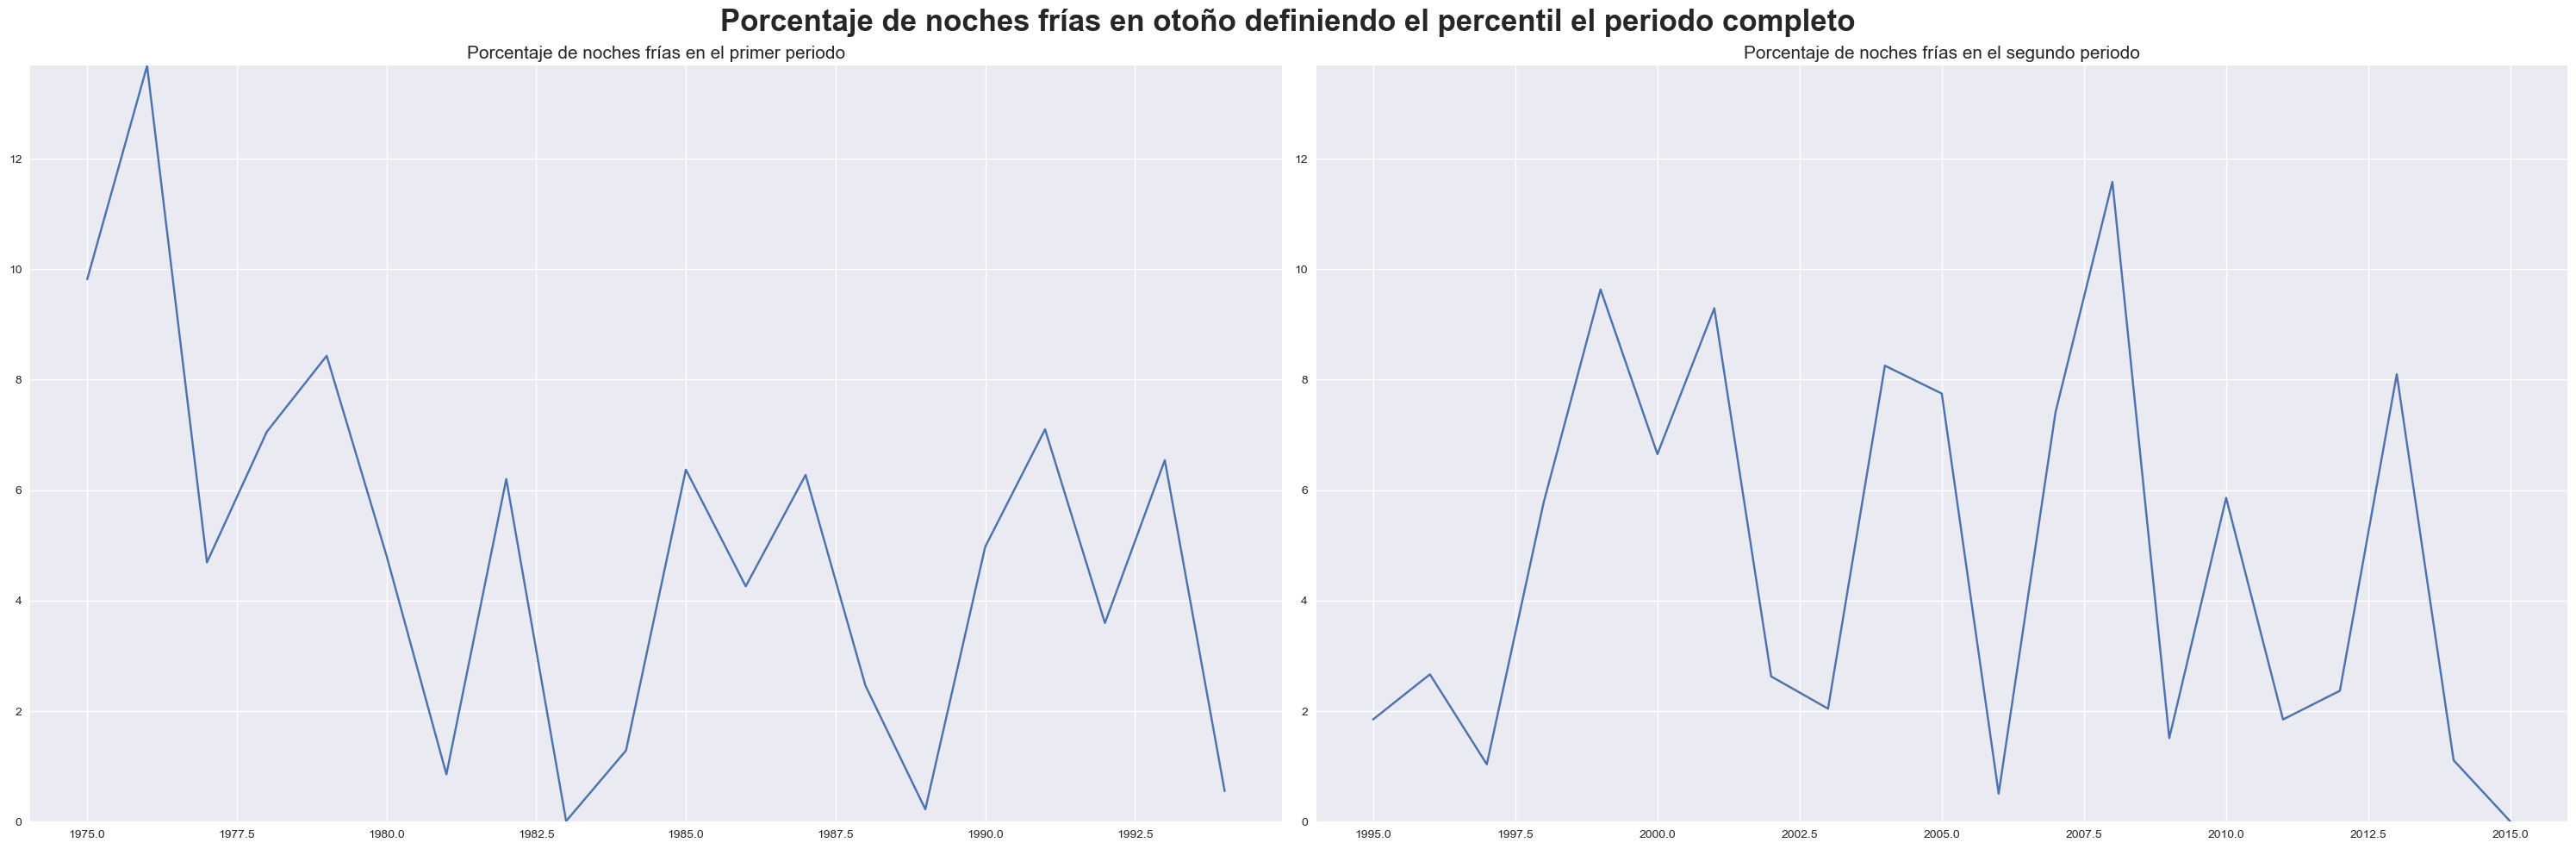

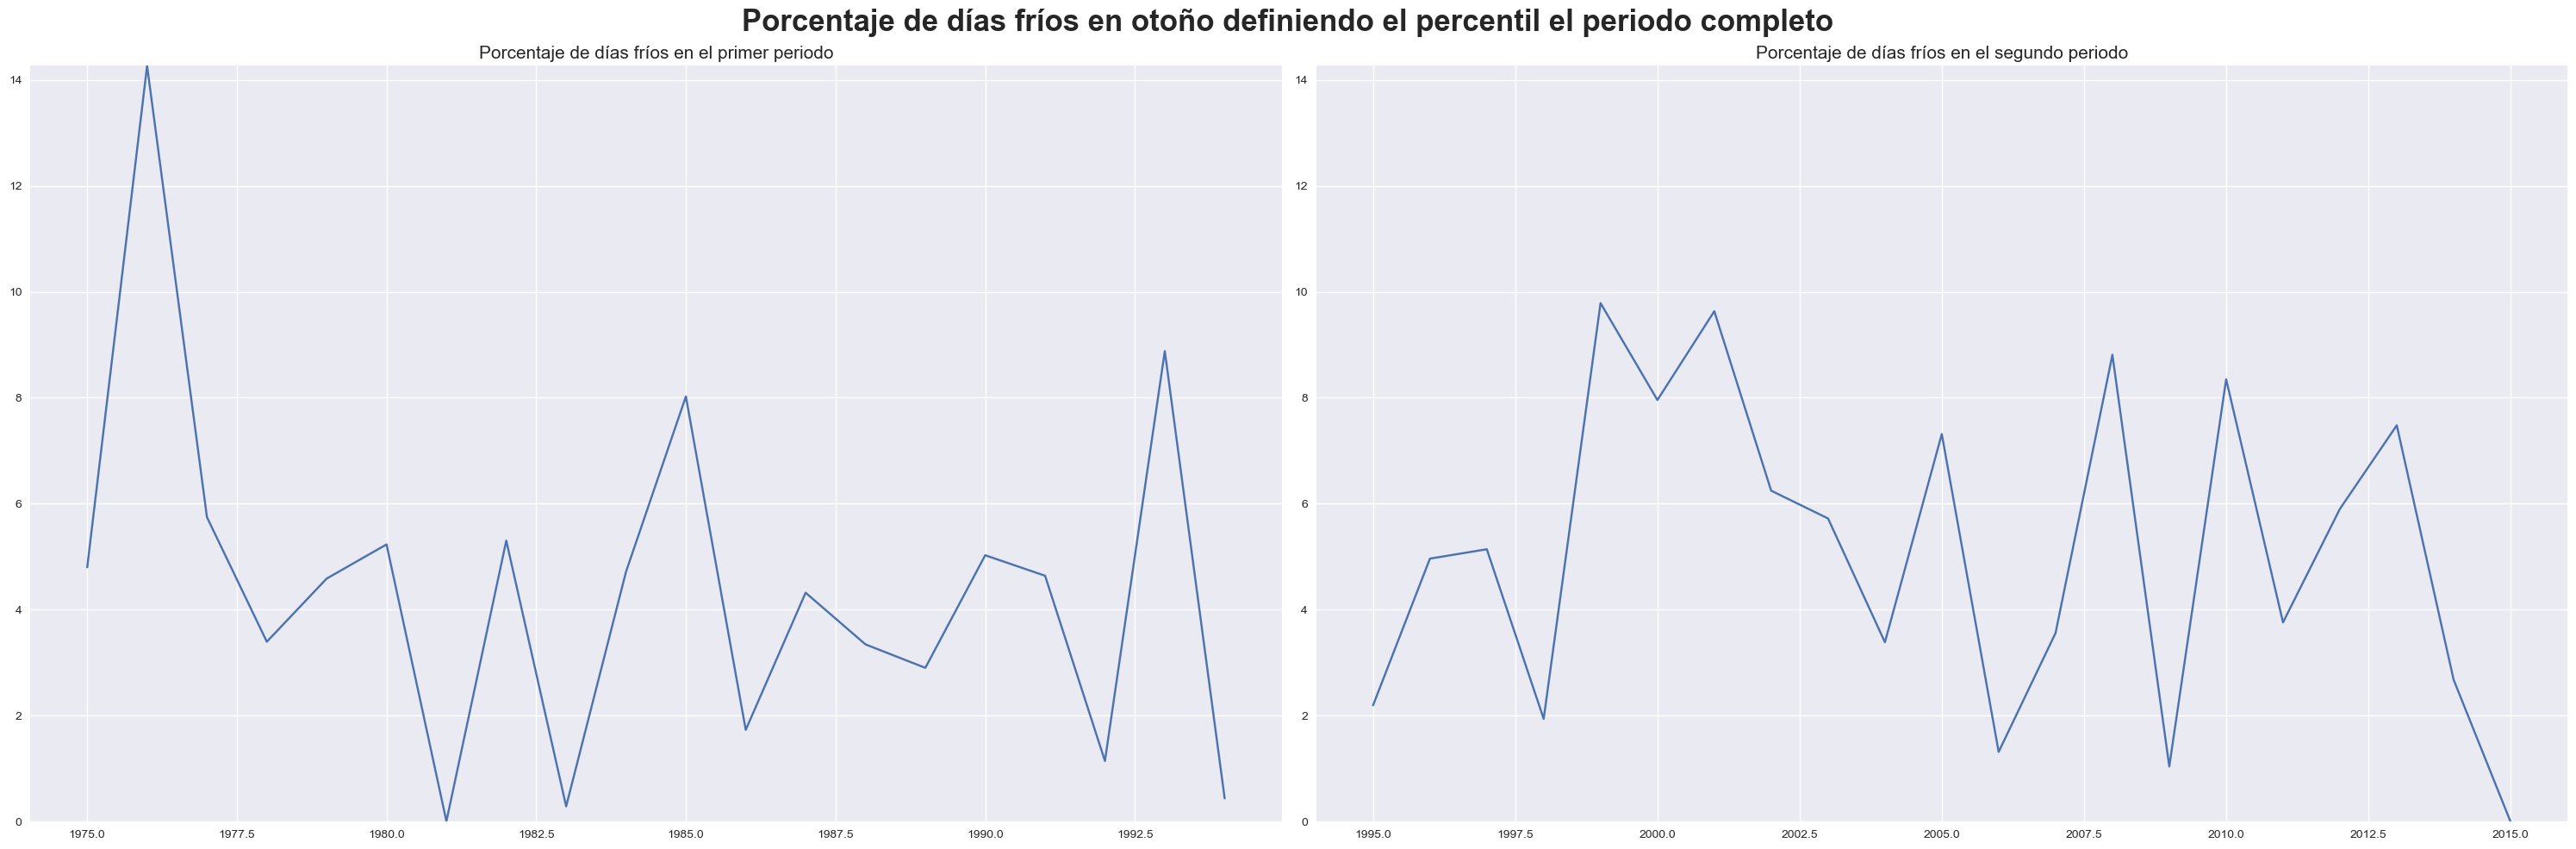

In [40]:
title= 'Porcentaje de noches frías en otoño definiendo el percentil el periodo completo'
title2= 'Porcentaje de días fríos en otoño definiendo el percentil el periodo completo'

cold_days_percentage(min_data_red, min_data_red_1, min_data_red_2,'SON',subtitle1,subtitle2,title)
cold_days_percentage(max_data_red, max_data_red_1, max_data_red_2,'SON',subtitle12,subtitle22,title2,cold_nights=False)